# Regression Predict House Price Solution

© ZINDI x DSN

---




### Predict Overview: Spain Electricity Shortfall Challenge

Wazobia Real Estate Limited is a prominent real estate company operating in Nigeria. With a vast portfolio of properties, they strive to provide accurate and competitive pricing for houses. However, they have been facing challenges in accurately predicting the prices of houses in the current market. To overcome this hurdle, Wazobia Real Estate Limited is seeking the expertise of data scientists like you to develop a robust predictive model.

The objective of this hackathon is to create a powerful and accurate predictive model that can estimate the prices of houses in Nigeria. By leveraging the provided dataset, you will analyze various factors that impact house prices, identify meaningful patterns, and build a model that can generate reliable price predictions. The ultimate goal is to provide Wazobia Real Estate Limited with an effective tool to make informed pricing decisions and enhance their competitiveness in the market.

By participating in this hackathon, you have the opportunity to make a significant impact on the operations and growth of Wazobia Real Estate Limited. Your data-driven solution will empower the company to overcome their pricing challenges, improve their market position, and deliver enhanced value to their customers.

This means that my tasks are:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the prices of houses in Nieria;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.



## Importing Libraries

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px



# Libraries for data preparation and model building
import sklearn
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import chi2, SelectKBest
import dabl
from dabl import plot
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
import xgboost as xgb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.linear_model import HuberRegressor, TheilSenRegressor
from sklearn.model_selection import GridSearchCV
import ptitprince as pt





# enhanced stats functions
from scipy import stats
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42
import warnings
warnings.filterwarnings('ignore')

## 2. Loading the Data

In [2]:
df = pd.read_csv('Housing_dataset_train.csv')
df.head(20)

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
6,7892,Kwara,Bungalow,NaN,4.0,4.0,2125789.778
7,3003,Katsina,Penthouse,3.0,3.0,5.0,2043107.592
8,555,Osun,Semi-detached duplex,NaN,1.0,2.0,1219453.877
9,3085,Kaduna,Penthouse,NaN,3.0,3.0,2710664.872


In [3]:
df['title'].unique()

array(['Semi-detached duplex', 'Apartment', nan, 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [4]:
# a = df[df['title']=='Bungalow']
# print(a[a['parking_space'].isna()][['bedroom', 'bathroom']].mean())
# print(a[a['parking_space'].isna()][['bedroom', 'bathroom']].median())
# print(a[a['parking_space'].isna()][['bedroom', 'bathroom']].std())
# print(a[a['parking_space'].isna()][['bedroom', 'bathroom']].var())
# print(a[a['parking_space'].isna()][['bedroom', 'bathroom']].min())
# print(a[a['parking_space'].isna()][['bedroom', 'bathroom']].max())

In [5]:
# a = df[df['title']=='Bungalow']
# print(a.groupby(['bedroom', 'parking_space'])['bathroom'].mean())
# print(a.groupby('bedroom')[['parking_space', 'bathroom']].median())
# print(a.groupby('bedroom')[['parking_space', 'bathroom']].std())
# print(a.groupby('bedroom')[['parking_space', 'bathroom']].var())
# print(a.groupby('bedroom')[['parking_space', 'bathroom']].min())
# print(a.groupby('bedroom')[['parking_space', 'bathroom']].max())

## 3. Exploratory Data Analysis (EDA)

In [6]:
# look at data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [7]:
# Convert the ID column to object datatype
df['ID'] = df['ID'].astype('object')

In [8]:
# have a look at feature distributions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,12201.0,4.308171e+00,2.441165e+00,1.00,2.000000e+00,4.000000e+00,6.000,9.00
bathroom,12195.0,3.134235e+00,2.035950e+00,1.00,1.000000e+00,2.000000e+00,5.000,7.00
parking_space,12189.0,3.169825e+00,1.599415e+00,1.00,2.000000e+00,3.000000e+00,4.000,6.00
price,14000.0,2.138082e+06,1.083057e+06,431967.29,1.393990e+06,1.895223e+06,2586699.494,16568486.16


<Axes: >

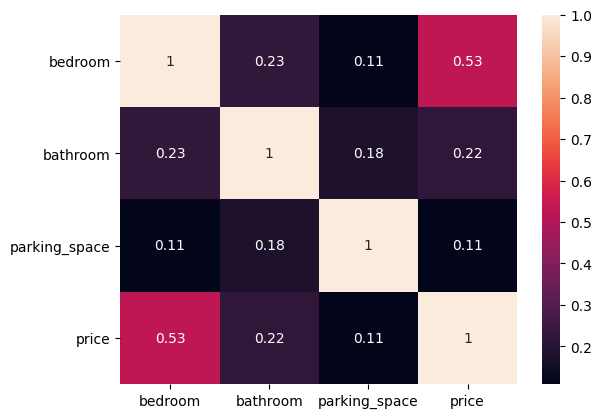

In [9]:
#plt.figure(figsize=[20,20])
sns.heatmap(df.corr(), annot=True)

In [10]:
df['ID'].astype('object')

0         3583
1         2748
2         9261
3         2224
4        10300
         ...  
13995     6175
13996     9704
13997    11190
13998     9256
13999     8787
Name: ID, Length: 14000, dtype: object

In [11]:
# Check for missing values
df.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [12]:
# what is the dimension of the dataset
df.shape

(14000, 7)

In [13]:
df.bedroom.median()

4.0

In [14]:
df.bedroom.mean()

4.308171461355626

In [15]:
df.parking_space.mean()

3.169825252276643

In [16]:
# # Handle missin values
df.parking_space.fillna(2, inplace=True)
df.bathroom.fillna(3, inplace=True)
df.bedroom.fillna(3, inplace=True)

In [17]:
# Verify the whether it is effected
df.isna().sum()

ID                  0
loc              1813
title            1722
bedroom             0
bathroom            0
parking_space       0
price               0
dtype: int64

In [18]:
# Drop the remainin missing values
df.dropna(inplace=True)

In [19]:
# Verify whether missing values are dropped
df.isna().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [20]:
# What is the new dimensionof the dataset after droppin the missing values
df.shape

(10531, 7)

In [21]:
# Find the 75th and 25th percentiles
price_seventy_fifth = df["price"].quantile(0.75)
price_twenty_fifth = df["price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
# df = df[df['price']>lower]
print(df[df["price"] > lower]) 
print(df[df["price"] < upper])
#print(df["price"].describe())

          ID      loc                 title  bedroom  bathroom  parking_space  \
0       3583  Katsina  Semi-detached duplex      2.0       2.0            1.0   
1       2748     Ondo             Apartment      3.0       2.0            4.0   
3       2224  Anambra       Detached duplex      5.0       2.0            4.0   
4      10300     Kogi        Terrace duplex      3.0       5.0            6.0   
5       1733    Borno               Mansion      3.0       1.0            3.0   
...      ...      ...                   ...      ...       ...            ...   
13994  10477   Taraba       Detached duplex      8.0       1.0            6.0   
13995   6175      Edo              Bungalow      3.0       7.0            2.0   
13996   9704   Kaduna             Apartment      3.0       7.0            5.0   
13997  11190  Plateau              Bungalow      8.0       6.0            5.0   
13998   9256    Delta                  Flat      3.0       6.0            1.0   

             price  
0     

In [22]:
# see what are the type of building
df.title.unique()

array(['Semi-detached duplex', 'Apartment', 'Detached duplex',
       'Terrace duplex', 'Mansion', 'Bungalow', 'Penthouse', 'Townhouse',
       'Flat', 'Cottage'], dtype=object)

In [23]:
df.kurtosis()

ID               -0.945599
bedroom          -0.513486
bathroom         -0.569320
parking_space    -0.773309
price            13.722397
dtype: float64

In [24]:
df.skew()

ID               0.610522
bedroom          0.647655
bathroom         0.722642
parking_space    0.534433
price            2.329209
dtype: float64

In [25]:
df.var()

ID               1.455645e+07
bedroom          5.220853e+00
bathroom         3.468113e+00
parking_space    2.334135e+00
price            1.144208e+12
dtype: float64

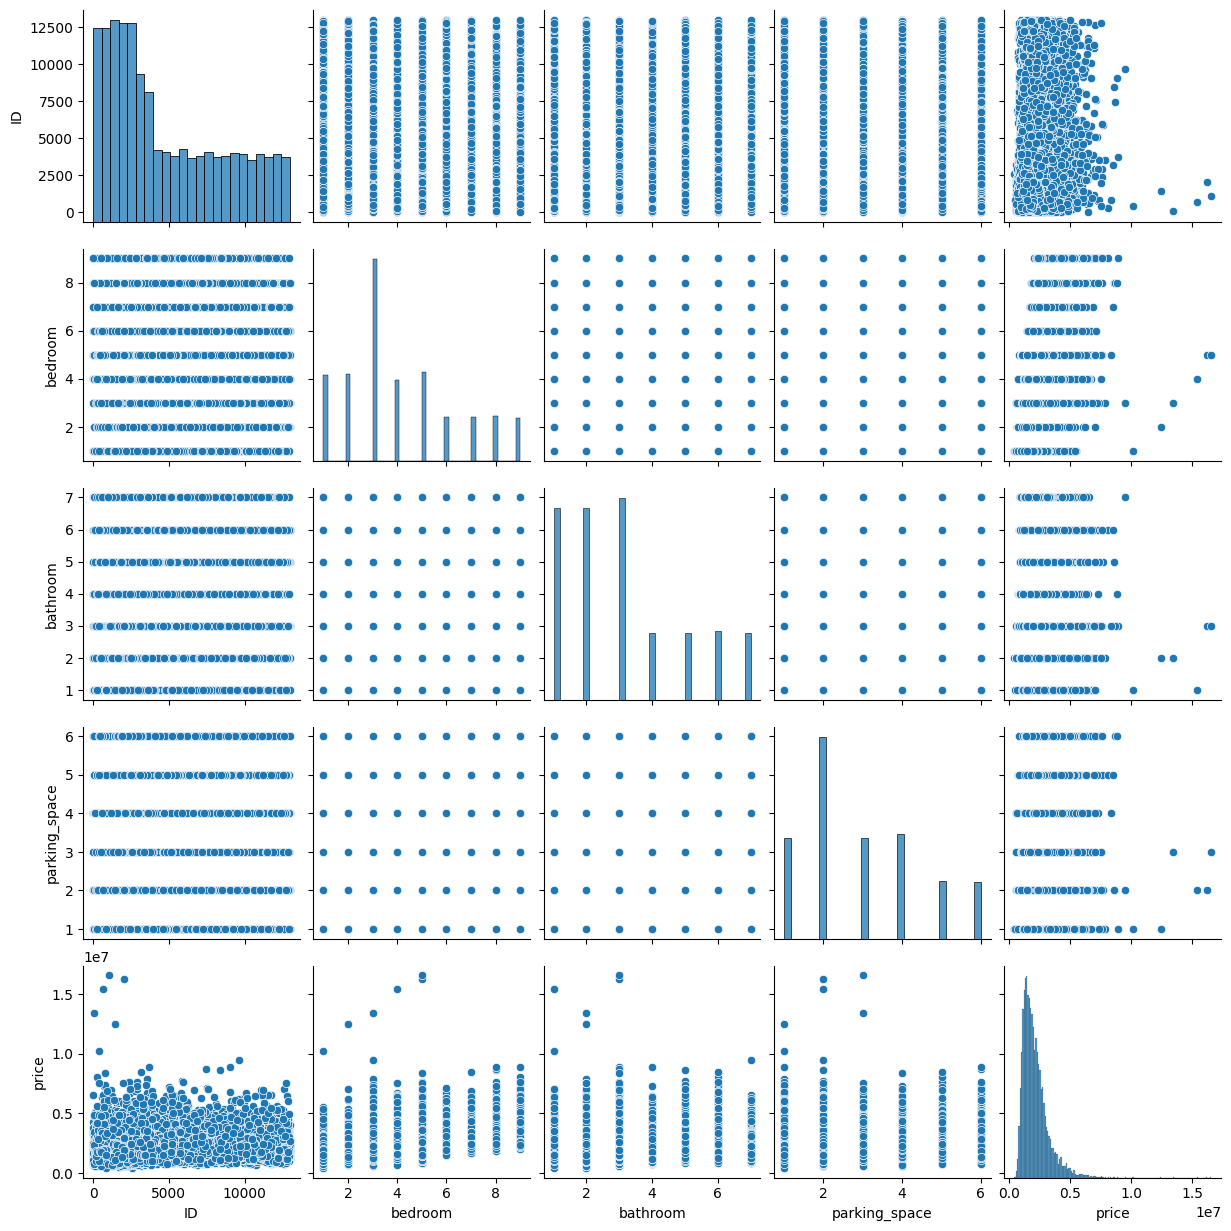

In [26]:
# Let's have a pairwise plot of the dataset
sns.pairplot(df)


In [27]:
# dabl.plot(df, target_col='price')

<Axes: xlabel='price', ylabel='Density'>

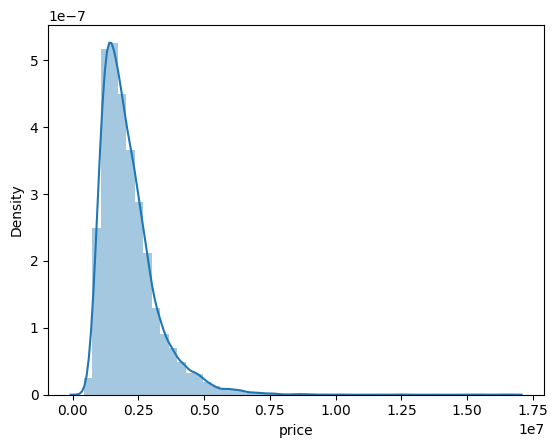

In [28]:
sns.distplot(df['price'])

In [29]:
print("skewness %f" %df['price'].skew())
print("kurtosis %f" %df['price'].kurtosis())

skewness 2.329209
kurtosis 13.722397


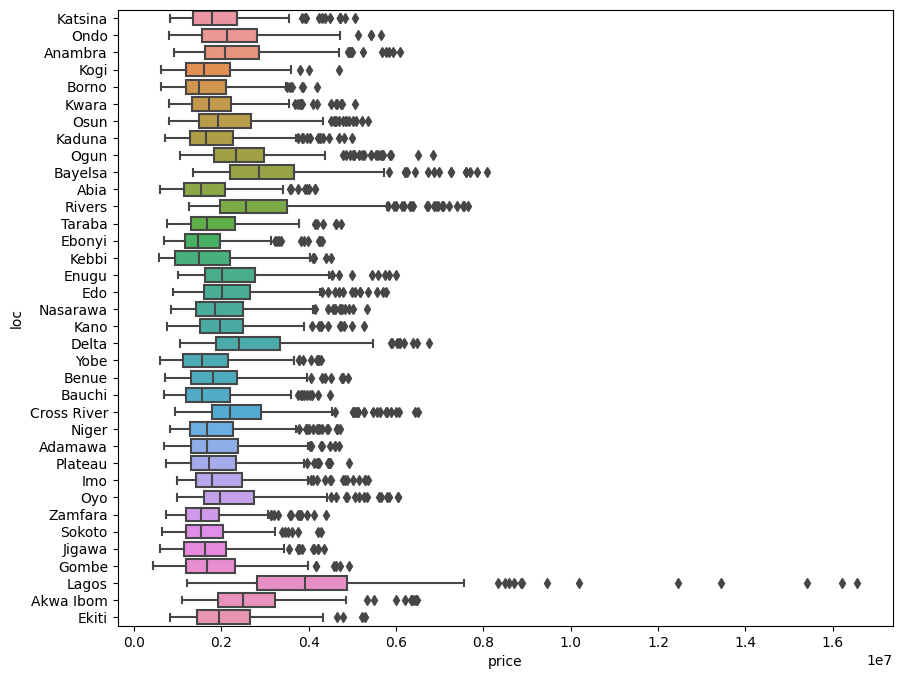

In [30]:
plt.figure(figsize=[10,8])
sns.boxplot(y=df['loc'], x=df['price'])
plt.show()

<Axes: xlabel='bedroom', ylabel='price'>

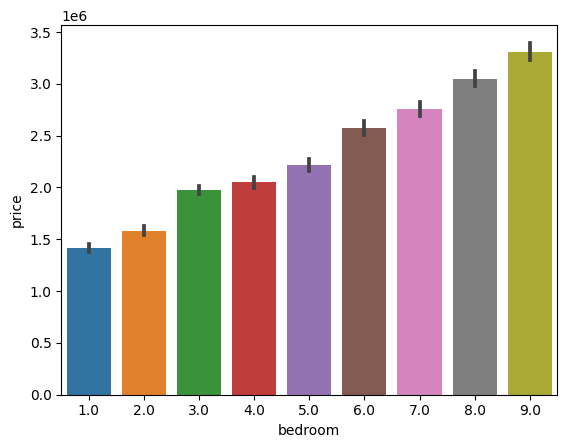

In [380]:
sns.barplot(x='bedroom', y='price', data=df)

 
 mu = 2127766.86 and sigma = 1069625.66



<function matplotlib.pyplot.show(close=None, block=None)>

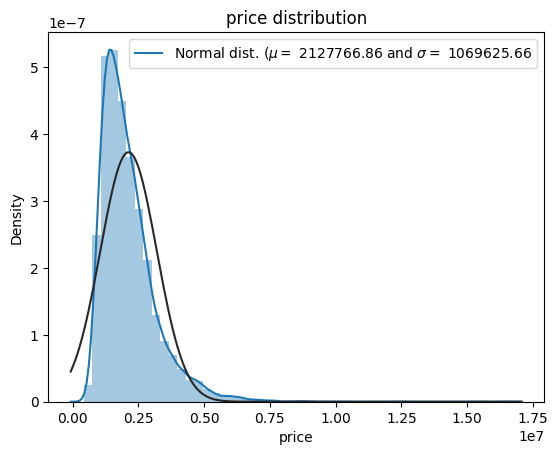

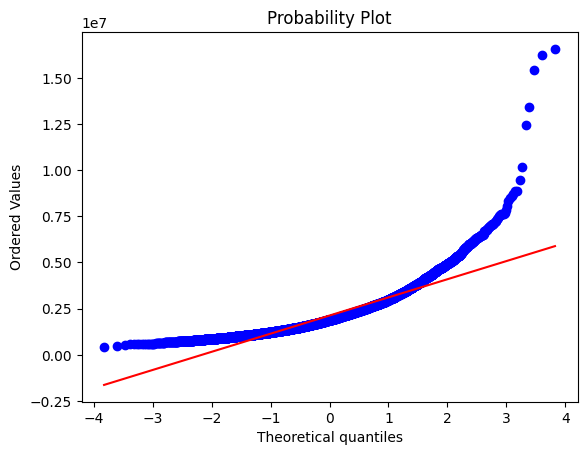

In [381]:
sns.distplot(df['price'], fit=norm)
(mu, sigma) = norm.fit(df['price'])
print(' \n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
          loc='best')
plt.title('price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show

log10, log2, log1p, emath.log

 
 mu = 14.47 and sigma = 0.44



<function matplotlib.pyplot.show(close=None, block=None)>

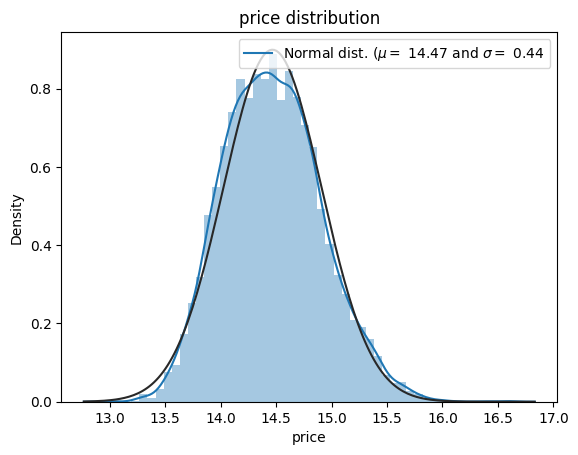

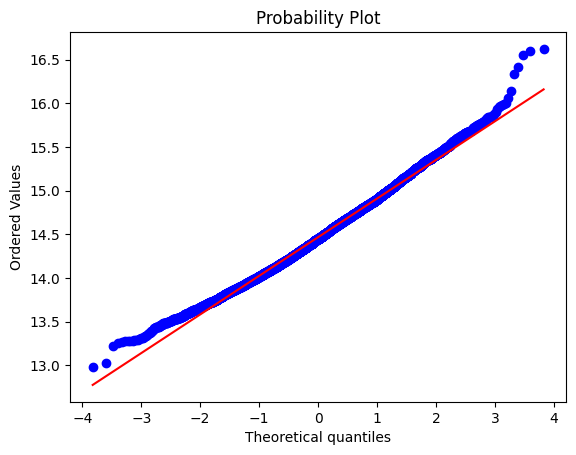

In [382]:
df['price'] = np.log1p(df['price'])
sns.distplot(df['price'], fit=norm)
(mu, sigma) = norm.fit(df['price'])
print(' \n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
          loc='best')
plt.title('price distribution')

fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show

In [383]:
df['price'].head(10)

0     13.955273
1     14.329781
3     14.695265
4     14.771292
5     14.109487
6     14.569654
7     14.529983
8     14.013914
9     14.812705
10    14.100850
Name: price, dtype: float64

In [384]:
a = np.expm1(df['price'])
a.head()

0    1149999.565
1    1672416.689
3    2410306.756
4    2600700.898
5    1341750.867
Name: price, dtype: float64

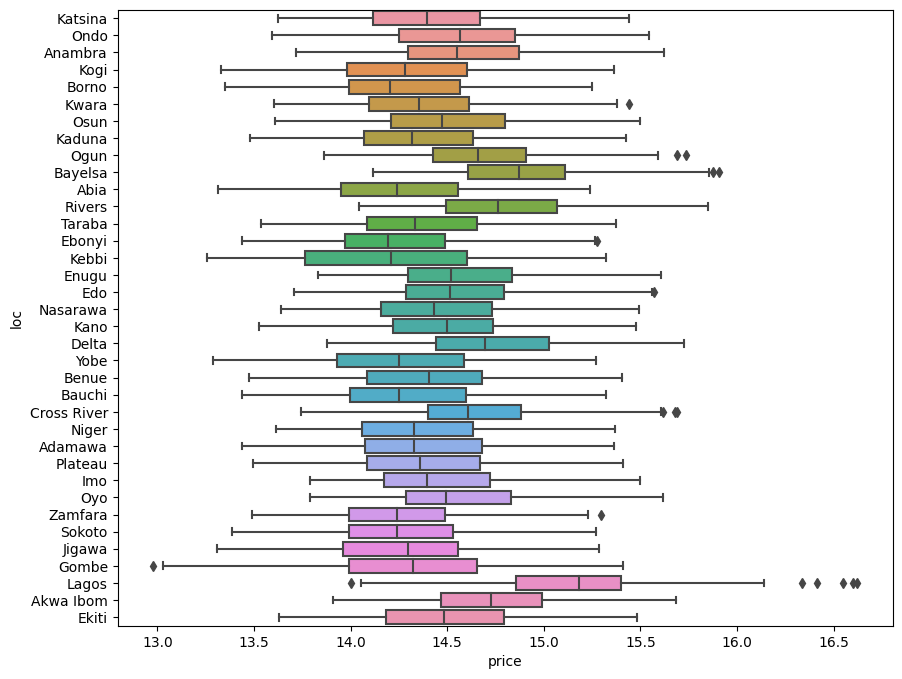

In [385]:
plt.figure(figsize=[10,8])
sns.boxplot(y=df['loc'], x=df['price'])
plt.show()

<Axes: >

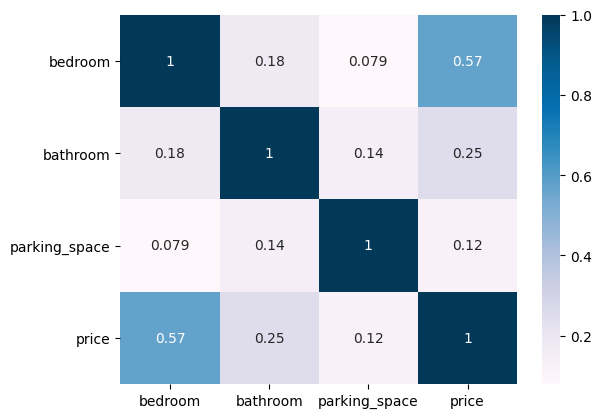

In [386]:
# Correlation
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)

In [387]:
# Process the data and do encodin
encoded_df = pd.get_dummies(df, columns=['loc', 'title'], drop_first=True)
encoded_df.head()

,ID,bedroom,bathroom,parking_space,price,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,3583,2.0,2.0,1.0,13.955273,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2748,3.0,2.0,4.0,14.329781,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2224,5.0,2.0,4.0,14.695265,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10300,3.0,5.0,6.0,14.771292,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1733,3.0,1.0,3.0,14.109487,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [388]:
# Columns of the encoded data 
encoded_df.columns

Index(['ID', 'bedroom', 'bathroom', 'parking_space', 'price', 'loc_Adamawa',
       'loc_Akwa Ibom', 'loc_Anambra', 'loc_Bauchi', 'loc_Bayelsa',
       'loc_Benue', 'loc_Borno', 'loc_Cross River', 'loc_Delta', 'loc_Ebonyi',
       'loc_Edo', 'loc_Ekiti', 'loc_Enugu', 'loc_Gombe', 'loc_Imo',
       'loc_Jigawa', 'loc_Kaduna', 'loc_Kano', 'loc_Katsina', 'loc_Kebbi',
       'loc_Kogi', 'loc_Kwara', 'loc_Lagos', 'loc_Nasarawa', 'loc_Niger',
       'loc_Ogun', 'loc_Ondo', 'loc_Osun', 'loc_Oyo', 'loc_Plateau',
       'loc_Rivers', 'loc_Sokoto', 'loc_Taraba', 'loc_Yobe', 'loc_Zamfara',
       'title_Bungalow', 'title_Cottage', 'title_Detached duplex',
       'title_Flat', 'title_Mansion', 'title_Penthouse',
       'title_Semi-detached duplex', 'title_Terrace duplex',
       'title_Townhouse'],
      dtype='object')

# Modeling


## Feature Spliting

In [389]:
# split data
X = encoded_df.drop(['price','ID'], axis=1)
y = encoded_df['price']

In [390]:
# bestfit = SelectKBest(score_func=chi2, k=10)
# fit = bestfit.fit(X,y)
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)
# featscores = pd.concat([dfcolumns,dfscores], axis=1) 
# featscores.columns = ['Features', 'Score']
# new_X = featscores.sort_values('Score', ascending=False).head(41)
# new_X.tail(11)

In [391]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,bedroom,bathroom,parking_space,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,loc_Borno,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,-0.914995,-0.596610,-1.295532,-0.16678,-0.163136,-0.174154,-0.167681,-0.16648,-0.173865,-0.172993,...,-0.173284,-0.341868,-0.196106,-0.344115,-0.355571,-0.345839,-0.342041,2.880068,-0.340654,-0.348243
1,-0.477322,-0.596610,0.668185,-0.16678,-0.163136,-0.174154,-0.167681,-0.16648,-0.173865,-0.172993,...,-0.173284,-0.341868,-0.196106,-0.344115,-0.355571,-0.345839,-0.342041,-0.347214,-0.340654,-0.348243
2,0.398024,-0.596610,0.668185,-0.16678,-0.163136,5.742035,-0.167681,-0.16648,-0.173865,-0.172993,...,-0.173284,-0.341868,-0.196106,2.906001,-0.355571,-0.345839,-0.342041,-0.347214,-0.340654,-0.348243
3,-0.477322,1.014389,1.977329,-0.16678,-0.163136,-0.174154,-0.167681,-0.16648,-0.173865,-0.172993,...,-0.173284,-0.341868,-0.196106,-0.344115,-0.355571,-0.345839,-0.342041,-0.347214,2.935533,-0.348243
4,-0.477322,-1.133609,0.013612,-0.16678,-0.163136,-0.174154,-0.167681,-0.16648,-0.173865,5.780574,...,-0.173284,-0.341868,-0.196106,-0.344115,-0.355571,2.891520,-0.342041,-0.347214,-0.340654,-0.348243


In [392]:
# create targets and features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:

display(f'Training predictor: {X_train.shape}')
display(f'Training target: {y_train.shape}')
display(f'Testing predictor: {X_test.shape}')
display(f'Testing target: {y_test.shape}')

'Training predictor: (8424, 47)'

'Training target: (8424,)'

'Testing predictor: (2107, 47)'

'Testing target: (2107,)'

## Creating Regression Models 

In [394]:
# Linear regression
reg = LinearRegression()
reg.fit(X_train,y_train)
predicts = reg.predict(X_test)
# train_pred = reg.predict(X_train)


In [395]:
# Lasso model

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)


In [396]:
# Ridge model
# ridge = Ridge()
# ridge.fit(X_train, y_train)
# pred_ridge = ridge.predict(X_test)



# Build and train the Ridge regression model
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter to control the regularization strength
ridge.fit(X_train, y_train)

# Make predictions on the test set
pred_ridge = ridge.predict(X_test)

In [397]:
# Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)

In [398]:
# Random forest
rf = RandomForestRegressor(n_estimators=200, max_depth=8)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [399]:
# Elastic Net Regression
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions_elastic_net = elastic_net.predict(X_test)



In [400]:
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_train)
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)
X_test_poly = polynomial_features.transform(X_test)
predictions_polynomial = poly_regression.predict(X_test_poly)



In [401]:
# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
predictions_svr = svr.predict(X_test)



In [402]:
# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(X_train, y_train)
predictions_gradient_boosting = gradient_boosting.predict(X_test)



In [403]:
# Neural Network Regression
neural_network = MLPRegressor()
neural_network.fit(X_train, y_train)
predictions_neural_network = neural_network.predict(X_test)




In [404]:
# Bayesian Regression
bayesian_regression = GaussianProcessRegressor()
bayesian_regression.fit(X_train, y_train)
predictions_bayesian = bayesian_regression.predict(X_test)



In [405]:
# K-Nearest Neighbors Regression
knn_regression = KNeighborsRegressor()
knn_regression.fit(X_train, y_train)
predictions_knn = knn_regression.predict(X_test)



In [406]:
# # Gaussian Process Regression
# gaussian_process = GaussianProcessRegressor(kernel=WhiteKernel() + RBF())
# gaussian_process.fit(X_train, y_train)
# predictions_gaussian_process = gaussian_process.predict(X_test)



In [407]:
# XGBoost Regression
xgboost = xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgboost = xgboost.predict(X_test)


In [408]:
# CatBoost Regression
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)



Learning rate set to 0.057334
0:	learn: 0.4266224	total: 8.68ms	remaining: 8.67s
1:	learn: 0.4126091	total: 15.2ms	remaining: 7.56s
2:	learn: 0.4003410	total: 21.4ms	remaining: 7.13s
3:	learn: 0.3883275	total: 28.1ms	remaining: 6.99s
4:	learn: 0.3767889	total: 34.4ms	remaining: 6.85s
5:	learn: 0.3661675	total: 41.1ms	remaining: 6.81s
6:	learn: 0.3566691	total: 47.8ms	remaining: 6.78s
7:	learn: 0.3472434	total: 55.2ms	remaining: 6.84s
8:	learn: 0.3391604	total: 61.8ms	remaining: 6.8s
9:	learn: 0.3312907	total: 67.2ms	remaining: 6.66s
10:	learn: 0.3244306	total: 73.2ms	remaining: 6.58s
11:	learn: 0.3180427	total: 79.9ms	remaining: 6.58s
12:	learn: 0.3119536	total: 86.8ms	remaining: 6.59s
13:	learn: 0.3065053	total: 92.2ms	remaining: 6.5s
14:	learn: 0.3014361	total: 97.5ms	remaining: 6.4s
15:	learn: 0.2964524	total: 103ms	remaining: 6.36s
16:	learn: 0.2917761	total: 109ms	remaining: 6.28s
17:	learn: 0.2873714	total: 114ms	remaining: 6.2s
18:	learn: 0.2830657	total: 119ms	remaining: 6.17s


163:	learn: 0.1700630	total: 964ms	remaining: 4.92s
164:	learn: 0.1698833	total: 970ms	remaining: 4.91s
165:	learn: 0.1697307	total: 974ms	remaining: 4.89s
166:	learn: 0.1695769	total: 979ms	remaining: 4.88s
167:	learn: 0.1694147	total: 983ms	remaining: 4.87s
168:	learn: 0.1692290	total: 988ms	remaining: 4.86s
169:	learn: 0.1690657	total: 992ms	remaining: 4.84s
170:	learn: 0.1689131	total: 997ms	remaining: 4.83s
171:	learn: 0.1687570	total: 1s	remaining: 4.82s
172:	learn: 0.1686113	total: 1s	remaining: 4.81s
173:	learn: 0.1684573	total: 1.01s	remaining: 4.8s
174:	learn: 0.1682968	total: 1.01s	remaining: 4.78s
175:	learn: 0.1681476	total: 1.02s	remaining: 4.77s
176:	learn: 0.1679925	total: 1.02s	remaining: 4.76s
177:	learn: 0.1678295	total: 1.03s	remaining: 4.75s
178:	learn: 0.1676997	total: 1.03s	remaining: 4.74s
179:	learn: 0.1675461	total: 1.04s	remaining: 4.73s
180:	learn: 0.1673982	total: 1.04s	remaining: 4.72s
181:	learn: 0.1672841	total: 1.05s	remaining: 4.71s
182:	learn: 0.16714

325:	learn: 0.1558800	total: 1.73s	remaining: 3.57s
326:	learn: 0.1558206	total: 1.74s	remaining: 3.57s
327:	learn: 0.1557823	total: 1.74s	remaining: 3.56s
328:	learn: 0.1557193	total: 1.75s	remaining: 3.56s
329:	learn: 0.1556712	total: 1.75s	remaining: 3.56s
330:	learn: 0.1556233	total: 1.76s	remaining: 3.55s
331:	learn: 0.1555650	total: 1.76s	remaining: 3.55s
332:	learn: 0.1555245	total: 1.77s	remaining: 3.54s
333:	learn: 0.1554729	total: 1.77s	remaining: 3.54s
334:	learn: 0.1554096	total: 1.78s	remaining: 3.53s
335:	learn: 0.1553523	total: 1.78s	remaining: 3.52s
336:	learn: 0.1553051	total: 1.79s	remaining: 3.52s
337:	learn: 0.1552584	total: 1.79s	remaining: 3.51s
338:	learn: 0.1551971	total: 1.8s	remaining: 3.5s
339:	learn: 0.1551460	total: 1.8s	remaining: 3.5s
340:	learn: 0.1551098	total: 1.8s	remaining: 3.49s
341:	learn: 0.1550523	total: 1.81s	remaining: 3.48s
342:	learn: 0.1550167	total: 1.81s	remaining: 3.48s
343:	learn: 0.1549643	total: 1.82s	remaining: 3.47s
344:	learn: 0.154

489:	learn: 0.1493142	total: 2.52s	remaining: 2.62s
490:	learn: 0.1492908	total: 2.53s	remaining: 2.62s
491:	learn: 0.1492457	total: 2.53s	remaining: 2.62s
492:	learn: 0.1492237	total: 2.54s	remaining: 2.61s
493:	learn: 0.1491972	total: 2.54s	remaining: 2.6s
494:	learn: 0.1491622	total: 2.55s	remaining: 2.6s
495:	learn: 0.1491256	total: 2.56s	remaining: 2.6s
496:	learn: 0.1490914	total: 2.56s	remaining: 2.59s
497:	learn: 0.1490712	total: 2.57s	remaining: 2.59s
498:	learn: 0.1490503	total: 2.57s	remaining: 2.58s
499:	learn: 0.1490116	total: 2.58s	remaining: 2.58s
500:	learn: 0.1489852	total: 2.58s	remaining: 2.57s
501:	learn: 0.1489564	total: 2.58s	remaining: 2.56s
502:	learn: 0.1489337	total: 2.59s	remaining: 2.56s
503:	learn: 0.1489105	total: 2.59s	remaining: 2.55s
504:	learn: 0.1488781	total: 2.6s	remaining: 2.55s
505:	learn: 0.1488610	total: 2.6s	remaining: 2.54s
506:	learn: 0.1488364	total: 2.61s	remaining: 2.54s
507:	learn: 0.1487897	total: 2.61s	remaining: 2.53s
508:	learn: 0.148

673:	learn: 0.1443209	total: 3.56s	remaining: 1.72s
674:	learn: 0.1443015	total: 3.57s	remaining: 1.72s
675:	learn: 0.1442827	total: 3.58s	remaining: 1.71s
676:	learn: 0.1442521	total: 3.58s	remaining: 1.71s
677:	learn: 0.1442326	total: 3.59s	remaining: 1.7s
678:	learn: 0.1442094	total: 3.59s	remaining: 1.7s
679:	learn: 0.1441779	total: 3.6s	remaining: 1.69s
680:	learn: 0.1441557	total: 3.6s	remaining: 1.69s
681:	learn: 0.1441388	total: 3.61s	remaining: 1.68s
682:	learn: 0.1441166	total: 3.61s	remaining: 1.68s
683:	learn: 0.1440967	total: 3.62s	remaining: 1.67s
684:	learn: 0.1440737	total: 3.62s	remaining: 1.67s
685:	learn: 0.1440447	total: 3.63s	remaining: 1.66s
686:	learn: 0.1440227	total: 3.63s	remaining: 1.66s
687:	learn: 0.1440005	total: 3.64s	remaining: 1.65s
688:	learn: 0.1439656	total: 3.64s	remaining: 1.64s
689:	learn: 0.1439473	total: 3.65s	remaining: 1.64s
690:	learn: 0.1439020	total: 3.65s	remaining: 1.63s
691:	learn: 0.1438811	total: 3.66s	remaining: 1.63s
692:	learn: 0.14

843:	learn: 0.1406578	total: 4.53s	remaining: 838ms
844:	learn: 0.1406426	total: 4.54s	remaining: 833ms
845:	learn: 0.1406286	total: 4.55s	remaining: 828ms
846:	learn: 0.1405981	total: 4.55s	remaining: 823ms
847:	learn: 0.1405696	total: 4.56s	remaining: 817ms
848:	learn: 0.1405496	total: 4.57s	remaining: 812ms
849:	learn: 0.1405280	total: 4.57s	remaining: 807ms
850:	learn: 0.1405109	total: 4.58s	remaining: 802ms
851:	learn: 0.1404933	total: 4.59s	remaining: 797ms
852:	learn: 0.1404819	total: 4.59s	remaining: 791ms
853:	learn: 0.1404464	total: 4.6s	remaining: 786ms
854:	learn: 0.1404223	total: 4.6s	remaining: 781ms
855:	learn: 0.1404024	total: 4.61s	remaining: 775ms
856:	learn: 0.1403832	total: 4.61s	remaining: 770ms
857:	learn: 0.1403655	total: 4.62s	remaining: 765ms
858:	learn: 0.1403465	total: 4.62s	remaining: 759ms
859:	learn: 0.1403350	total: 4.63s	remaining: 754ms
860:	learn: 0.1403037	total: 4.63s	remaining: 748ms
861:	learn: 0.1402924	total: 4.64s	remaining: 743ms
862:	learn: 0.

In [409]:
# Huber Regression
huber_regression = HuberRegressor()
huber_regression.fit(X_train, y_train)
predictions_huber = huber_regression.predict(X_test)



In [410]:
# Theil-Sen Regression
theil_sen_regression = TheilSenRegressor()
theil_sen_regression.fit(X_train, y_train)
pred_sneil = huber_regression.predict(X_test)

## Model Evaluation

In [411]:
#Comparing the True value and the Predicted Value of our models
lin = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predicts)})
lass = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_lasso)})
ridge = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_ridge)})
des_tree = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_tree)})
rf2 = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(rf_pred)})
elastic = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_elastic_net)})
poly = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_polynomial)}) 
svr = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_svr)})
grad= pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_gradient_boosting)})
neural = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_neural_network)})
bay = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_bayesian)})
knn = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_knn)})
# gaus = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_gaussian_process})
xgb = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_xgboost)})
cat = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_catboost)})
hub = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(predictions_huber)})
theil = pd.DataFrame({'Actual': np.expm1(y_test), 'Predicted': np.expm1(pred_sneil)})




In [412]:
#Linear Model 
print(f'lin: {lin.head(10)}') 
print('\n')

# Lasso Model
print(f'lass:{lass.head(10)}')
print('\n')

# Ridge Model
print(f'ridge: {ridge.head(10)}') 
print('\n')

#Decision Tree Model
print(f'tree: {des_tree.head(10)}') 
print('\n')

# Random Forest Model
print(f'random: {rf2.head(10)}') 
print('\n')

print(f'elastic: {elastic.head(10)}') 
print('\n')

print(f'poly: {poly.head(10)}') 
print('\n')

print(f'svr: {svr.head(10)}') 
print('\n')

print(f'grad: {grad.head(10)}') 
print('\n')

print(f'neural: {neural.head(10)}') 
print('\n')

print(f'bayessian: {bay.head(10)}') 
print('\n')


print(f'knn: {knn.head(10)}') 
print('\n')

# print(f'gaus: {gaus.head(10)}') 
# print('\n')

print(f'xgb: {xgb.head(10)}') 
print('\n')

print(f'cat: {cat.head(10)}') 
print('\n')

print(f'hub: {hub.head(10)}') 
print('\n')

print(f'sneil: {theil.head(10)}') 
print('\n')





lin:              Actual     Predicted
5616   2.100251e+06  3.499738e+06
2816   1.396578e+06  1.399189e+06
1862   2.172564e+06  2.154809e+06
7135   2.228775e+06  2.265995e+06
3815   3.212206e+06  3.220129e+06
10717  8.719912e+05  9.834655e+05
8850   1.541040e+06  1.568870e+06
5186   2.798413e+06  2.799073e+06
10286  1.997792e+06  1.903308e+06
4828   1.461064e+06  2.357132e+06


lass:             Actual     Predicted
5616   2.100251e+06  2.878003e+06
2816   1.396578e+06  1.502507e+06
1862   2.172564e+06  1.478086e+06
7135   2.228775e+06  1.869680e+06
3815   3.212206e+06  2.976164e+06
10717  8.719912e+05  1.298817e+06
8850   1.541040e+06  1.219724e+06
5186   2.798413e+06  2.780850e+06
10286  1.997792e+06  1.999322e+06
4828   1.461064e+06  2.355152e+06


ridge:              Actual     Predicted
5616   2.100251e+06  3.498984e+06
2816   1.396578e+06  1.399079e+06
1862   2.172564e+06  2.154281e+06
7135   2.228775e+06  2.265522e+06
3815   3.212206e+06  3.219721e+06
10717  8.719912e+05  9.8346

In [413]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(mse(y_test,predicts)),
                        "Ridge": np.sqrt(mse(y_test,pred_ridge)),
                        "Lasso" : np.sqrt(mse(y_test,pred_lasso)),
                        "Decision Tree" : np.sqrt(mse(y_test,pred_tree)),
                        "Random Forest" : np.sqrt(mse(y_test,rf_pred)),
                        "elastic net regression": np.sqrt(mse(y_test,predictions_elastic_net)),
                        "polynomial": np.sqrt(mse(y_test,predictions_polynomial)),
                        "support vector" : np.sqrt(mse(y_test,predictions_svr)),
                        "gradient boosting" : np.sqrt(mse(y_test,predictions_gradient_boosting)),
                        "neural network" : np.sqrt(mse(y_test,predictions_neural_network)),
                        "bayesian": np.sqrt(mse(y_test,predictions_bayesian)),
                        "k-nearest neighbour": np.sqrt(mse(y_test,predictions_knn)),
#                         "gaussian process" : np.sqrt(mse(y_test,predictions_gaussian_process)),
                        "Catboost" : np.sqrt(mse(y_test,predictions_catboost)),
                        "Huber" : np.sqrt(mse(y_test,predictions_huber)),
                        "Theil-Sen" : np.sqrt(mse(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

,Test RMSE
Catboost,0.154119
Decision Tree,0.230345
Huber,0.165415
Lasso,0.263582
Linear model,0.162927
Random Forest,0.231147
Ridge,0.162927
Theil-Sen,0.165415
bayesian,1.364618
elastic net regression,0.434204


elastic net regression
polynomial
support vector
random forest
gradient boosting
neural network
bayesian 
k-nearest neighbour
gaussian process
XGBoost 
CatBoost 
Huber 
Theil-Sen

In [414]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)


In [415]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (mse(y_test,predicts)),
                        "Ridge": (mse(y_test,pred_ridge)),
                        "Lasso" : (mse(y_test,pred_lasso)),
                        "Decision Tree" : (mse(y_test,pred_tree)),
                        "Random Forest" : (mse(y_test,rf_pred)),
                        "elastic net regression": (mse(y_test,predictions_elastic_net)),
                        "polynomial": (mse(y_test,predictions_polynomial)),
                        "support vector" : (mse(y_test,predictions_svr)),
                        "gradient boosting" : (mse(y_test,predictions_gradient_boosting)),
                        "neural network" : (mse(y_test,predictions_neural_network)),
                        "bayesian": (mse(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (mse(y_test,predictions_knn)),
#                         "gaussian process" : (mse(y_test,predictions_gaussian_process)),
                        "CatBoost" : (mse(y_test,predictions_catboost)),
                         "Huber" : (mse(y_test,predictions_huber)),
                        "Theil-Sen" : (mse(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

,Test MSE
CatBoost,0.023753
Decision Tree,0.053059
Huber,0.027362
Lasso,0.069475
Linear model,0.026545
Random Forest,0.053429
Ridge,0.026545
Theil-Sen,0.027362
bayesian,1.862182
elastic net regression,0.188533


In [416]:
px.bar(Model_Performance2, y =Model_Performance2['Test MSE'],
       color = Model_Performance2.index, width =700, height=400)


In [417]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (mae(y_test,predicts)),
                        "Ridge": (mae(y_test,pred_ridge)),
                        "Lasso" : (mae(y_test,pred_lasso)),
                        "Decision Tree" : (mae(y_test,pred_tree)),
                        "Random Forest" : (mae(y_test,rf_pred)),
                        "elastic net regression": (mae(y_test,predictions_elastic_net)),
                        "polynomial": (mae(y_test,predictions_polynomial)),
                        "support vector" : (mae(y_test,predictions_svr)),
                        "gradient boosting" : (mae(y_test,predictions_gradient_boosting)),
                        "neural network" : (mae(y_test,predictions_neural_network)),
                        "bayesian": (mae(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (mae(y_test,predictions_knn)),
#                         "gaussian process" : (mae(y_test,predictions_gaussian_process)),
                        "CatBoost" : (mae(y_test,predictions_catboost)),
                        "Huber" : (mae(y_test,predictions_huber)),
                        "Theil-Sen" : (mae(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

,Test MAE
CatBoost,0.091547
Decision Tree,0.147562
Huber,0.095233
Lasso,0.204109
Linear model,0.099101
Random Forest,0.178665
Ridge,0.099110
Theil-Sen,0.095233
bayesian,0.936271
elastic net regression,0.348200


In [418]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)


In [419]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                         {"Linear model": (r2_score(y_test,predicts)),
                        "Ridge": (r2_score(y_test,pred_ridge)),
                        "Lasso" : (r2_score(y_test,pred_lasso)),
                        "Decision Tree" : (r2_score(y_test,pred_tree)),
                        "Random Forest" : (r2_score(y_test,rf_pred)),
                        "elastic net regression": (r2_score(y_test,predictions_elastic_net)),
                        "polynomial": (r2_score(y_test,predictions_polynomial)),
                        "support vector" : (r2_score(y_test,predictions_svr)),
                        "gradient boosting" : (r2_score(y_test,predictions_gradient_boosting)),
                        "neural network" : (r2_score(y_test,predictions_neural_network)),
                        "bayesian": (r2_score(y_test,predictions_bayesian)),
                        "k-nearest neighbour": (r2_score(y_test,predictions_knn)),
#                         "gaussian process" : (r2_score(y_test,predictions_gaussian_process)),
                        "CatBoost" : (r2_score(y_test,predictions_catboost)),
                        "Huber" : (r2_score(y_test,predictions_huber)),
                        "Theil-Sen" : (r2_score(y_test,pred_sneil))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

,Test R^2
CatBoost,0.882767
Decision Tree,0.738124
Huber,0.864952
Lasso,0.657099
Linear model,0.868984
Random Forest,0.736296
Ridge,0.868984
Theil-Sen,0.864952
bayesian,-8.190962
elastic net regression,0.069477


In [420]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)


In [421]:
df2 = pd.read_csv('Housing_dataset_test.csv')
df2.head()

,ID,loc,title,bedroom,bathroom,parking_space
0,845,Kano,Penthouse,4,1,2
1,1924,Adamawa,Apartment,2,2,4
2,10718,Adamawa,Bungalow,2,7,2
3,12076,Lagos,Mansion,9,5,2
4,12254,Gombe,Semi-detached duplex,5,6,1


In [422]:
df3 = pd.get_dummies(df2, columns=['loc', 'title'], drop_first=True)
df3.head()

,ID,bedroom,bathroom,parking_space,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,loc_Zamfara,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse
0,845,4,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1924,2,2,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10718,2,7,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,12076,9,5,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,12254,5,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [423]:
df2.shape

(6000, 6)

In [424]:
catboost = cb.CatBoostRegressor()
catboost.fit(X_train, y_train)
predictions_catboost = catboost.predict(X_test)


df3['price'] = catboost.predict(df3)

Learning rate set to 0.057334
0:	learn: 0.4266224	total: 6.59ms	remaining: 6.58s
1:	learn: 0.4126091	total: 13ms	remaining: 6.47s
2:	learn: 0.4003410	total: 19.2ms	remaining: 6.37s
3:	learn: 0.3883275	total: 25.6ms	remaining: 6.36s
4:	learn: 0.3767889	total: 30.6ms	remaining: 6.09s
5:	learn: 0.3661675	total: 36ms	remaining: 5.96s
6:	learn: 0.3566691	total: 41.4ms	remaining: 5.87s
7:	learn: 0.3472434	total: 47.3ms	remaining: 5.86s
8:	learn: 0.3391604	total: 53ms	remaining: 5.84s
9:	learn: 0.3312907	total: 57.8ms	remaining: 5.72s
10:	learn: 0.3244306	total: 62.5ms	remaining: 5.62s
11:	learn: 0.3180427	total: 67.9ms	remaining: 5.59s
12:	learn: 0.3119536	total: 72.6ms	remaining: 5.51s
13:	learn: 0.3065053	total: 77.3ms	remaining: 5.45s
14:	learn: 0.3014361	total: 82.7ms	remaining: 5.43s
15:	learn: 0.2964524	total: 87.5ms	remaining: 5.38s
16:	learn: 0.2917761	total: 92.3ms	remaining: 5.34s
17:	learn: 0.2873714	total: 98.2ms	remaining: 5.36s
18:	learn: 0.2830657	total: 103ms	remaining: 5.32s

170:	learn: 0.1689131	total: 916ms	remaining: 4.44s
171:	learn: 0.1687570	total: 923ms	remaining: 4.44s
172:	learn: 0.1686113	total: 928ms	remaining: 4.44s
173:	learn: 0.1684573	total: 934ms	remaining: 4.43s
174:	learn: 0.1682968	total: 940ms	remaining: 4.43s
175:	learn: 0.1681476	total: 945ms	remaining: 4.42s
176:	learn: 0.1679925	total: 951ms	remaining: 4.42s
177:	learn: 0.1678295	total: 956ms	remaining: 4.41s
178:	learn: 0.1676997	total: 962ms	remaining: 4.41s
179:	learn: 0.1675461	total: 968ms	remaining: 4.41s
180:	learn: 0.1673982	total: 972ms	remaining: 4.4s
181:	learn: 0.1672841	total: 977ms	remaining: 4.39s
182:	learn: 0.1671480	total: 982ms	remaining: 4.39s
183:	learn: 0.1670191	total: 987ms	remaining: 4.38s
184:	learn: 0.1668912	total: 992ms	remaining: 4.37s
185:	learn: 0.1667786	total: 996ms	remaining: 4.36s
186:	learn: 0.1666363	total: 1s	remaining: 4.35s
187:	learn: 0.1664843	total: 1s	remaining: 4.34s
188:	learn: 0.1663620	total: 1.01s	remaining: 4.33s
189:	learn: 0.16622

332:	learn: 0.1555245	total: 1.71s	remaining: 3.43s
333:	learn: 0.1554729	total: 1.72s	remaining: 3.43s
334:	learn: 0.1554096	total: 1.73s	remaining: 3.43s
335:	learn: 0.1553523	total: 1.73s	remaining: 3.42s
336:	learn: 0.1553051	total: 1.74s	remaining: 3.42s
337:	learn: 0.1552584	total: 1.74s	remaining: 3.41s
338:	learn: 0.1551971	total: 1.75s	remaining: 3.41s
339:	learn: 0.1551460	total: 1.76s	remaining: 3.41s
340:	learn: 0.1551098	total: 1.76s	remaining: 3.4s
341:	learn: 0.1550523	total: 1.77s	remaining: 3.4s
342:	learn: 0.1550167	total: 1.77s	remaining: 3.39s
343:	learn: 0.1549643	total: 1.78s	remaining: 3.39s
344:	learn: 0.1549113	total: 1.78s	remaining: 3.38s
345:	learn: 0.1548479	total: 1.79s	remaining: 3.38s
346:	learn: 0.1547967	total: 1.79s	remaining: 3.37s
347:	learn: 0.1547452	total: 1.79s	remaining: 3.36s
348:	learn: 0.1546982	total: 1.8s	remaining: 3.36s
349:	learn: 0.1546680	total: 1.8s	remaining: 3.35s
350:	learn: 0.1546241	total: 1.81s	remaining: 3.34s
351:	learn: 0.15

521:	learn: 0.1483219	total: 2.65s	remaining: 2.43s
522:	learn: 0.1482786	total: 2.66s	remaining: 2.43s
523:	learn: 0.1482290	total: 2.67s	remaining: 2.42s
524:	learn: 0.1481830	total: 2.67s	remaining: 2.42s
525:	learn: 0.1481643	total: 2.68s	remaining: 2.41s
526:	learn: 0.1481399	total: 2.68s	remaining: 2.41s
527:	learn: 0.1480979	total: 2.69s	remaining: 2.4s
528:	learn: 0.1480748	total: 2.69s	remaining: 2.4s
529:	learn: 0.1480366	total: 2.7s	remaining: 2.39s
530:	learn: 0.1480168	total: 2.71s	remaining: 2.39s
531:	learn: 0.1479837	total: 2.71s	remaining: 2.38s
532:	learn: 0.1479590	total: 2.71s	remaining: 2.38s
533:	learn: 0.1479237	total: 2.72s	remaining: 2.37s
534:	learn: 0.1478787	total: 2.72s	remaining: 2.37s
535:	learn: 0.1478560	total: 2.73s	remaining: 2.36s
536:	learn: 0.1478118	total: 2.73s	remaining: 2.36s
537:	learn: 0.1477853	total: 2.74s	remaining: 2.35s
538:	learn: 0.1477651	total: 2.74s	remaining: 2.35s
539:	learn: 0.1477377	total: 2.75s	remaining: 2.34s
540:	learn: 0.1

701:	learn: 0.1436253	total: 3.68s	remaining: 1.56s
702:	learn: 0.1436024	total: 3.69s	remaining: 1.56s
703:	learn: 0.1435844	total: 3.69s	remaining: 1.55s
704:	learn: 0.1435642	total: 3.7s	remaining: 1.55s
705:	learn: 0.1435459	total: 3.71s	remaining: 1.54s
706:	learn: 0.1435264	total: 3.71s	remaining: 1.54s
707:	learn: 0.1435057	total: 3.72s	remaining: 1.53s
708:	learn: 0.1434867	total: 3.72s	remaining: 1.53s
709:	learn: 0.1434631	total: 3.73s	remaining: 1.52s
710:	learn: 0.1434387	total: 3.73s	remaining: 1.52s
711:	learn: 0.1434044	total: 3.74s	remaining: 1.51s
712:	learn: 0.1433842	total: 3.74s	remaining: 1.51s
713:	learn: 0.1433525	total: 3.75s	remaining: 1.5s
714:	learn: 0.1433373	total: 3.75s	remaining: 1.5s
715:	learn: 0.1433106	total: 3.76s	remaining: 1.49s
716:	learn: 0.1432867	total: 3.76s	remaining: 1.49s
717:	learn: 0.1432699	total: 3.77s	remaining: 1.48s
718:	learn: 0.1432583	total: 3.77s	remaining: 1.47s
719:	learn: 0.1432405	total: 3.78s	remaining: 1.47s
720:	learn: 0.1

862:	learn: 0.1402705	total: 4.47s	remaining: 710ms
863:	learn: 0.1402505	total: 4.47s	remaining: 705ms
864:	learn: 0.1402397	total: 4.48s	remaining: 699ms
865:	learn: 0.1402196	total: 4.49s	remaining: 694ms
866:	learn: 0.1401971	total: 4.49s	remaining: 689ms
867:	learn: 0.1401726	total: 4.5s	remaining: 684ms
868:	learn: 0.1401548	total: 4.5s	remaining: 679ms
869:	learn: 0.1401417	total: 4.51s	remaining: 674ms
870:	learn: 0.1401218	total: 4.51s	remaining: 668ms
871:	learn: 0.1400981	total: 4.52s	remaining: 663ms
872:	learn: 0.1400761	total: 4.52s	remaining: 658ms
873:	learn: 0.1400551	total: 4.53s	remaining: 653ms
874:	learn: 0.1400288	total: 4.53s	remaining: 648ms
875:	learn: 0.1400169	total: 4.54s	remaining: 642ms
876:	learn: 0.1399939	total: 4.54s	remaining: 637ms
877:	learn: 0.1399674	total: 4.55s	remaining: 632ms
878:	learn: 0.1399504	total: 4.55s	remaining: 626ms
879:	learn: 0.1399277	total: 4.55s	remaining: 621ms
880:	learn: 0.1399110	total: 4.56s	remaining: 616ms
881:	learn: 0.

In [425]:
df3['price'] = np.expm1(df3['price'])

In [426]:
save_data = df3[['ID','price']]
save_data.to_csv(r'C:\Users\Dell\Documents\Data Science\Zindi\House_price_pred12.csv', index=False)
save_data.head(20)

,ID,price
0,845,2.394716e+06
1,1924,1.069966e+06
2,10718,1.134401e+06
3,12076,8.564786e+06
4,12254,1.880369e+06
5,9950,3.021695e+06
6,1548,2.485836e+06
7,526,1.200905e+06
8,6776,1.015627e+06
9,1851,1.342570e+06


In [427]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(reg, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.8575886  0.85677113 0.85767296 0.86845636 0.8559385  0.85298584]
Average Score: 0.8582355632637145
Standard Deviation: 0.0048335697008103475


In [428]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(lasso, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.65686009 0.64576722 0.6396689  0.64878375 0.66110288 0.65166664]
Average Score: 0.6506415823340803
Standard Deviation: 0.007032898147602281


In [429]:
# # Create a KFold object
# kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# # Perform cross-validation
# cv_scores = cross_val_score(ridge, X, y, cv=kfold)

# # Calculate and print average score and standard deviation
# avg_score = cv_scores.mean()
# std_dev = cv_scores.std()
# print("Average Score:", avg_score)
# print("Standard Deviation:", std_dev)


X2 = encoded_df.drop('price', axis=1)  # Drop the 'price' column as it is the target variable
y2 = encoded_df['price']

# Initialize the Ridge regression model
ridge = Ridge()

# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(ridge, X2, y2, cv=kfold) # '''scoring=('neg_mean_squared_error')''''

# Convert the negative mean squared errors to positive values
mse_scores = cv_scores

# Calculate and print average score and standard deviation
avg_score = mse_scores.mean()
std_dev = mse_scores.std()

# Output the calculated variables
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.85983715 0.85892216 0.85910765 0.86903973 0.85783626 0.85495579]
Average Score: 0.8599497906104712
Standard Deviation: 0.00435530200390192


In [430]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(tree, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.7097734  0.69343054 0.70994226 0.73686445 0.71179795 0.67193826]
Average Score: 0.7056244774240045
Standard Deviation: 0.019720367611188613


In [431]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.72361522 0.72141571 0.72130983 0.73367058 0.72995469 0.71226906]
Average Score: 0.7237058485625553
Standard Deviation: 0.006832983604200057


In [432]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(poly_regression, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.8575886  0.85677113 0.85767296 0.86845636 0.8559385  0.85298584]
Average Score: 0.8582355632637145
Standard Deviation: 0.0048335697008103475


In [433]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(catboost, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()


Learning rate set to 0.057705
0:	learn: 0.4292735	total: 5.29ms	remaining: 5.28s
1:	learn: 0.4149974	total: 9.83ms	remaining: 4.91s
2:	learn: 0.4022533	total: 15ms	remaining: 4.97s
3:	learn: 0.3896082	total: 19.5ms	remaining: 4.86s
4:	learn: 0.3780525	total: 24ms	remaining: 4.77s
5:	learn: 0.3680687	total: 29ms	remaining: 4.8s
6:	learn: 0.3578197	total: 33.5ms	remaining: 4.75s
7:	learn: 0.3487729	total: 37.9ms	remaining: 4.71s
8:	learn: 0.3401301	total: 43.3ms	remaining: 4.76s
9:	learn: 0.3322050	total: 47.8ms	remaining: 4.73s
10:	learn: 0.3248988	total: 52.2ms	remaining: 4.69s
11:	learn: 0.3184708	total: 57ms	remaining: 4.69s
12:	learn: 0.3122977	total: 61.8ms	remaining: 4.69s
13:	learn: 0.3066280	total: 66.2ms	remaining: 4.67s
14:	learn: 0.3015672	total: 71ms	remaining: 4.66s
15:	learn: 0.2966334	total: 75.9ms	remaining: 4.67s
16:	learn: 0.2921445	total: 80.3ms	remaining: 4.64s
17:	learn: 0.2881400	total: 84.7ms	remaining: 4.62s
18:	learn: 0.2839292	total: 89.5ms	remaining: 4.62s
19:

191:	learn: 0.1656594	total: 956ms	remaining: 4.02s
192:	learn: 0.1655514	total: 963ms	remaining: 4.03s
193:	learn: 0.1654301	total: 969ms	remaining: 4.03s
194:	learn: 0.1653194	total: 974ms	remaining: 4.02s
195:	learn: 0.1651704	total: 980ms	remaining: 4.02s
196:	learn: 0.1650590	total: 986ms	remaining: 4.02s
197:	learn: 0.1649550	total: 991ms	remaining: 4.01s
198:	learn: 0.1648525	total: 996ms	remaining: 4.01s
199:	learn: 0.1647287	total: 1s	remaining: 4.01s
200:	learn: 0.1645453	total: 1.01s	remaining: 4s
201:	learn: 0.1644231	total: 1.01s	remaining: 4s
202:	learn: 0.1643170	total: 1.02s	remaining: 3.99s
203:	learn: 0.1642124	total: 1.02s	remaining: 3.99s
204:	learn: 0.1640932	total: 1.03s	remaining: 3.98s
205:	learn: 0.1639563	total: 1.03s	remaining: 3.98s
206:	learn: 0.1638552	total: 1.04s	remaining: 3.97s
207:	learn: 0.1637548	total: 1.04s	remaining: 3.96s
208:	learn: 0.1636577	total: 1.04s	remaining: 3.96s
209:	learn: 0.1635613	total: 1.05s	remaining: 3.95s
210:	learn: 0.1634685

352:	learn: 0.1541860	total: 1.74s	remaining: 3.19s
353:	learn: 0.1541497	total: 1.75s	remaining: 3.19s
354:	learn: 0.1541107	total: 1.75s	remaining: 3.19s
355:	learn: 0.1540391	total: 1.76s	remaining: 3.19s
356:	learn: 0.1539873	total: 1.77s	remaining: 3.18s
357:	learn: 0.1539496	total: 1.77s	remaining: 3.18s
358:	learn: 0.1539215	total: 1.78s	remaining: 3.17s
359:	learn: 0.1538696	total: 1.78s	remaining: 3.17s
360:	learn: 0.1538339	total: 1.79s	remaining: 3.17s
361:	learn: 0.1537961	total: 1.79s	remaining: 3.16s
362:	learn: 0.1537414	total: 1.8s	remaining: 3.16s
363:	learn: 0.1537010	total: 1.8s	remaining: 3.15s
364:	learn: 0.1536525	total: 1.81s	remaining: 3.15s
365:	learn: 0.1536123	total: 1.81s	remaining: 3.14s
366:	learn: 0.1535852	total: 1.82s	remaining: 3.13s
367:	learn: 0.1535323	total: 1.82s	remaining: 3.13s
368:	learn: 0.1534725	total: 1.83s	remaining: 3.12s
369:	learn: 0.1534321	total: 1.83s	remaining: 3.12s
370:	learn: 0.1533911	total: 1.84s	remaining: 3.11s
371:	learn: 0.

515:	learn: 0.1481618	total: 2.54s	remaining: 2.39s
516:	learn: 0.1481211	total: 2.55s	remaining: 2.38s
517:	learn: 0.1480964	total: 2.56s	remaining: 2.38s
518:	learn: 0.1480516	total: 2.56s	remaining: 2.37s
519:	learn: 0.1480234	total: 2.57s	remaining: 2.37s
520:	learn: 0.1479585	total: 2.57s	remaining: 2.37s
521:	learn: 0.1479294	total: 2.58s	remaining: 2.36s
522:	learn: 0.1478998	total: 2.58s	remaining: 2.36s
523:	learn: 0.1478739	total: 2.59s	remaining: 2.35s
524:	learn: 0.1478514	total: 2.59s	remaining: 2.35s
525:	learn: 0.1478259	total: 2.6s	remaining: 2.34s
526:	learn: 0.1478056	total: 2.6s	remaining: 2.33s
527:	learn: 0.1477760	total: 2.61s	remaining: 2.33s
528:	learn: 0.1477600	total: 2.61s	remaining: 2.33s
529:	learn: 0.1477310	total: 2.62s	remaining: 2.32s
530:	learn: 0.1477055	total: 2.62s	remaining: 2.31s
531:	learn: 0.1476671	total: 2.63s	remaining: 2.31s
532:	learn: 0.1476384	total: 2.63s	remaining: 2.31s
533:	learn: 0.1476062	total: 2.63s	remaining: 2.3s
534:	learn: 0.1

678:	learn: 0.1438355	total: 3.34s	remaining: 1.58s
679:	learn: 0.1437929	total: 3.35s	remaining: 1.57s
680:	learn: 0.1437781	total: 3.35s	remaining: 1.57s
681:	learn: 0.1437600	total: 3.36s	remaining: 1.56s
682:	learn: 0.1437394	total: 3.36s	remaining: 1.56s
683:	learn: 0.1437217	total: 3.37s	remaining: 1.55s
684:	learn: 0.1436999	total: 3.37s	remaining: 1.55s
685:	learn: 0.1436851	total: 3.38s	remaining: 1.55s
686:	learn: 0.1436630	total: 3.38s	remaining: 1.54s
687:	learn: 0.1436426	total: 3.39s	remaining: 1.54s
688:	learn: 0.1436235	total: 3.39s	remaining: 1.53s
689:	learn: 0.1436057	total: 3.4s	remaining: 1.53s
690:	learn: 0.1435622	total: 3.4s	remaining: 1.52s
691:	learn: 0.1435304	total: 3.41s	remaining: 1.52s
692:	learn: 0.1435114	total: 3.41s	remaining: 1.51s
693:	learn: 0.1434891	total: 3.42s	remaining: 1.51s
694:	learn: 0.1434583	total: 3.42s	remaining: 1.5s
695:	learn: 0.1434287	total: 3.43s	remaining: 1.5s
696:	learn: 0.1434121	total: 3.43s	remaining: 1.49s
697:	learn: 0.14

850:	learn: 0.1402036	total: 4.2s	remaining: 735ms
851:	learn: 0.1401802	total: 4.21s	remaining: 731ms
852:	learn: 0.1401650	total: 4.22s	remaining: 727ms
853:	learn: 0.1401541	total: 4.23s	remaining: 723ms
854:	learn: 0.1401440	total: 4.23s	remaining: 718ms
855:	learn: 0.1401269	total: 4.24s	remaining: 713ms
856:	learn: 0.1401080	total: 4.24s	remaining: 708ms
857:	learn: 0.1400834	total: 4.25s	remaining: 703ms
858:	learn: 0.1400537	total: 4.25s	remaining: 698ms
859:	learn: 0.1400199	total: 4.26s	remaining: 693ms
860:	learn: 0.1400022	total: 4.26s	remaining: 688ms
861:	learn: 0.1399781	total: 4.27s	remaining: 683ms
862:	learn: 0.1399550	total: 4.27s	remaining: 678ms
863:	learn: 0.1399276	total: 4.28s	remaining: 673ms
864:	learn: 0.1399125	total: 4.28s	remaining: 668ms
865:	learn: 0.1398970	total: 4.29s	remaining: 663ms
866:	learn: 0.1398777	total: 4.29s	remaining: 658ms
867:	learn: 0.1398481	total: 4.29s	remaining: 653ms
868:	learn: 0.1398310	total: 4.3s	remaining: 648ms
869:	learn: 0.

36:	learn: 0.2371227	total: 173ms	remaining: 4.5s
37:	learn: 0.2355668	total: 180ms	remaining: 4.56s
38:	learn: 0.2341055	total: 186ms	remaining: 4.58s
39:	learn: 0.2323398	total: 192ms	remaining: 4.6s
40:	learn: 0.2308930	total: 197ms	remaining: 4.62s
41:	learn: 0.2294858	total: 203ms	remaining: 4.63s
42:	learn: 0.2282417	total: 208ms	remaining: 4.63s
43:	learn: 0.2269130	total: 214ms	remaining: 4.65s
44:	learn: 0.2256535	total: 221ms	remaining: 4.69s
45:	learn: 0.2244384	total: 226ms	remaining: 4.69s
46:	learn: 0.2229503	total: 232ms	remaining: 4.7s
47:	learn: 0.2218787	total: 236ms	remaining: 4.68s
48:	learn: 0.2207697	total: 241ms	remaining: 4.67s
49:	learn: 0.2197234	total: 246ms	remaining: 4.67s
50:	learn: 0.2187224	total: 250ms	remaining: 4.66s
51:	learn: 0.2176597	total: 255ms	remaining: 4.65s
52:	learn: 0.2165368	total: 260ms	remaining: 4.64s
53:	learn: 0.2154713	total: 264ms	remaining: 4.63s
54:	learn: 0.2143075	total: 269ms	remaining: 4.62s
55:	learn: 0.2134691	total: 274ms	

197:	learn: 0.1633738	total: 975ms	remaining: 3.95s
198:	learn: 0.1632582	total: 982ms	remaining: 3.95s
199:	learn: 0.1631344	total: 988ms	remaining: 3.95s
200:	learn: 0.1630244	total: 993ms	remaining: 3.95s
201:	learn: 0.1629187	total: 999ms	remaining: 3.95s
202:	learn: 0.1628182	total: 1s	remaining: 3.94s
203:	learn: 0.1627153	total: 1.01s	remaining: 3.94s
204:	learn: 0.1626112	total: 1.01s	remaining: 3.94s
205:	learn: 0.1625144	total: 1.02s	remaining: 3.93s
206:	learn: 0.1624162	total: 1.02s	remaining: 3.92s
207:	learn: 0.1623078	total: 1.03s	remaining: 3.92s
208:	learn: 0.1622199	total: 1.03s	remaining: 3.92s
209:	learn: 0.1620918	total: 1.04s	remaining: 3.91s
210:	learn: 0.1619620	total: 1.04s	remaining: 3.91s
211:	learn: 0.1618700	total: 1.05s	remaining: 3.9s
212:	learn: 0.1617728	total: 1.05s	remaining: 3.89s
213:	learn: 0.1616872	total: 1.06s	remaining: 3.89s
214:	learn: 0.1615509	total: 1.06s	remaining: 3.88s
215:	learn: 0.1614581	total: 1.07s	remaining: 3.87s
216:	learn: 0.16

361:	learn: 0.1514957	total: 1.77s	remaining: 3.12s
362:	learn: 0.1514506	total: 1.78s	remaining: 3.12s
363:	learn: 0.1514096	total: 1.78s	remaining: 3.12s
364:	learn: 0.1513733	total: 1.79s	remaining: 3.11s
365:	learn: 0.1513133	total: 1.79s	remaining: 3.11s
366:	learn: 0.1512794	total: 1.8s	remaining: 3.1s
367:	learn: 0.1512433	total: 1.8s	remaining: 3.1s
368:	learn: 0.1511932	total: 1.81s	remaining: 3.1s
369:	learn: 0.1511565	total: 1.82s	remaining: 3.1s
370:	learn: 0.1511103	total: 1.82s	remaining: 3.09s
371:	learn: 0.1510740	total: 1.83s	remaining: 3.09s
372:	learn: 0.1510365	total: 1.83s	remaining: 3.08s
373:	learn: 0.1509629	total: 1.84s	remaining: 3.08s
374:	learn: 0.1509265	total: 1.84s	remaining: 3.08s
375:	learn: 0.1508927	total: 1.85s	remaining: 3.07s
376:	learn: 0.1508553	total: 1.85s	remaining: 3.06s
377:	learn: 0.1508067	total: 1.86s	remaining: 3.06s
378:	learn: 0.1507479	total: 1.86s	remaining: 3.05s
379:	learn: 0.1507065	total: 1.87s	remaining: 3.05s
380:	learn: 0.1506

545:	learn: 0.1449075	total: 2.67s	remaining: 2.23s
546:	learn: 0.1448699	total: 2.68s	remaining: 2.22s
547:	learn: 0.1448410	total: 2.69s	remaining: 2.22s
548:	learn: 0.1448074	total: 2.69s	remaining: 2.21s
549:	learn: 0.1447884	total: 2.7s	remaining: 2.21s
550:	learn: 0.1447621	total: 2.7s	remaining: 2.2s
551:	learn: 0.1447291	total: 2.71s	remaining: 2.2s
552:	learn: 0.1447091	total: 2.71s	remaining: 2.19s
553:	learn: 0.1446598	total: 2.72s	remaining: 2.19s
554:	learn: 0.1446314	total: 2.72s	remaining: 2.18s
555:	learn: 0.1446151	total: 2.73s	remaining: 2.18s
556:	learn: 0.1445751	total: 2.73s	remaining: 2.17s
557:	learn: 0.1445485	total: 2.74s	remaining: 2.17s
558:	learn: 0.1445105	total: 2.74s	remaining: 2.16s
559:	learn: 0.1444710	total: 2.75s	remaining: 2.16s
560:	learn: 0.1444020	total: 2.75s	remaining: 2.15s
561:	learn: 0.1443694	total: 2.76s	remaining: 2.15s
562:	learn: 0.1443295	total: 2.76s	remaining: 2.14s
563:	learn: 0.1443090	total: 2.77s	remaining: 2.14s
564:	learn: 0.14

706:	learn: 0.1406585	total: 3.46s	remaining: 1.44s
707:	learn: 0.1406341	total: 3.47s	remaining: 1.43s
708:	learn: 0.1406120	total: 3.48s	remaining: 1.43s
709:	learn: 0.1405974	total: 3.48s	remaining: 1.42s
710:	learn: 0.1405745	total: 3.49s	remaining: 1.42s
711:	learn: 0.1405461	total: 3.49s	remaining: 1.41s
712:	learn: 0.1405284	total: 3.5s	remaining: 1.41s
713:	learn: 0.1405115	total: 3.5s	remaining: 1.4s
714:	learn: 0.1404875	total: 3.51s	remaining: 1.4s
715:	learn: 0.1404686	total: 3.51s	remaining: 1.39s
716:	learn: 0.1404535	total: 3.52s	remaining: 1.39s
717:	learn: 0.1404335	total: 3.52s	remaining: 1.38s
718:	learn: 0.1404147	total: 3.53s	remaining: 1.38s
719:	learn: 0.1403979	total: 3.53s	remaining: 1.37s
720:	learn: 0.1403818	total: 3.54s	remaining: 1.37s
721:	learn: 0.1403457	total: 3.54s	remaining: 1.36s
722:	learn: 0.1403154	total: 3.55s	remaining: 1.36s
723:	learn: 0.1402957	total: 3.55s	remaining: 1.35s
724:	learn: 0.1402801	total: 3.56s	remaining: 1.35s
725:	learn: 0.14

867:	learn: 0.1372215	total: 4.26s	remaining: 648ms
868:	learn: 0.1371997	total: 4.27s	remaining: 643ms
869:	learn: 0.1371855	total: 4.27s	remaining: 639ms
870:	learn: 0.1371698	total: 4.28s	remaining: 634ms
871:	learn: 0.1371381	total: 4.28s	remaining: 629ms
872:	learn: 0.1371247	total: 4.29s	remaining: 624ms
873:	learn: 0.1371062	total: 4.29s	remaining: 619ms
874:	learn: 0.1370862	total: 4.3s	remaining: 615ms
875:	learn: 0.1370734	total: 4.31s	remaining: 610ms
876:	learn: 0.1370475	total: 4.31s	remaining: 605ms
877:	learn: 0.1370161	total: 4.32s	remaining: 600ms
878:	learn: 0.1369989	total: 4.32s	remaining: 595ms
879:	learn: 0.1369745	total: 4.33s	remaining: 590ms
880:	learn: 0.1369515	total: 4.33s	remaining: 585ms
881:	learn: 0.1369280	total: 4.33s	remaining: 580ms
882:	learn: 0.1369128	total: 4.34s	remaining: 575ms
883:	learn: 0.1368781	total: 4.34s	remaining: 570ms
884:	learn: 0.1368687	total: 4.35s	remaining: 565ms
885:	learn: 0.1368597	total: 4.35s	remaining: 560ms
886:	learn: 0

33:	learn: 0.2431511	total: 181ms	remaining: 5.15s
34:	learn: 0.2412046	total: 188ms	remaining: 5.19s
35:	learn: 0.2393555	total: 194ms	remaining: 5.2s
36:	learn: 0.2378100	total: 201ms	remaining: 5.23s
37:	learn: 0.2360286	total: 207ms	remaining: 5.24s
38:	learn: 0.2345505	total: 213ms	remaining: 5.25s
39:	learn: 0.2330467	total: 224ms	remaining: 5.38s
40:	learn: 0.2316253	total: 230ms	remaining: 5.38s
41:	learn: 0.2303356	total: 237ms	remaining: 5.39s
42:	learn: 0.2290227	total: 243ms	remaining: 5.41s
43:	learn: 0.2277267	total: 249ms	remaining: 5.41s
44:	learn: 0.2265294	total: 255ms	remaining: 5.41s
45:	learn: 0.2252673	total: 260ms	remaining: 5.39s
46:	learn: 0.2237482	total: 266ms	remaining: 5.39s
47:	learn: 0.2226415	total: 272ms	remaining: 5.39s
48:	learn: 0.2214041	total: 278ms	remaining: 5.39s
49:	learn: 0.2203580	total: 283ms	remaining: 5.38s
50:	learn: 0.2194130	total: 288ms	remaining: 5.37s
51:	learn: 0.2184115	total: 295ms	remaining: 5.37s
52:	learn: 0.2171876	total: 300m

230:	learn: 0.1615589	total: 1.18s	remaining: 3.93s
231:	learn: 0.1614798	total: 1.19s	remaining: 3.93s
232:	learn: 0.1612919	total: 1.19s	remaining: 3.92s
233:	learn: 0.1612260	total: 1.2s	remaining: 3.92s
234:	learn: 0.1611374	total: 1.2s	remaining: 3.92s
235:	learn: 0.1610647	total: 1.21s	remaining: 3.92s
236:	learn: 0.1609759	total: 1.21s	remaining: 3.91s
237:	learn: 0.1609155	total: 1.22s	remaining: 3.91s
238:	learn: 0.1608220	total: 1.23s	remaining: 3.9s
239:	learn: 0.1607611	total: 1.23s	remaining: 3.9s
240:	learn: 0.1606915	total: 1.24s	remaining: 3.92s
241:	learn: 0.1605379	total: 1.25s	remaining: 3.93s
242:	learn: 0.1604312	total: 1.27s	remaining: 3.95s
243:	learn: 0.1603646	total: 1.28s	remaining: 3.95s
244:	learn: 0.1603085	total: 1.3s	remaining: 4.01s
245:	learn: 0.1601952	total: 1.31s	remaining: 4.01s
246:	learn: 0.1601163	total: 1.32s	remaining: 4.02s
247:	learn: 0.1600016	total: 1.32s	remaining: 4.02s
248:	learn: 0.1599234	total: 1.33s	remaining: 4.02s
249:	learn: 0.159

394:	learn: 0.1517786	total: 2.14s	remaining: 3.28s
395:	learn: 0.1517078	total: 2.15s	remaining: 3.28s
396:	learn: 0.1516810	total: 2.15s	remaining: 3.27s
397:	learn: 0.1516407	total: 2.16s	remaining: 3.27s
398:	learn: 0.1515973	total: 2.17s	remaining: 3.27s
399:	learn: 0.1515670	total: 2.18s	remaining: 3.27s
400:	learn: 0.1515250	total: 2.19s	remaining: 3.26s
401:	learn: 0.1514824	total: 2.19s	remaining: 3.26s
402:	learn: 0.1514334	total: 2.2s	remaining: 3.26s
403:	learn: 0.1514000	total: 2.2s	remaining: 3.25s
404:	learn: 0.1513660	total: 2.21s	remaining: 3.24s
405:	learn: 0.1513296	total: 2.21s	remaining: 3.24s
406:	learn: 0.1512907	total: 2.22s	remaining: 3.23s
407:	learn: 0.1512184	total: 2.22s	remaining: 3.22s
408:	learn: 0.1511687	total: 2.23s	remaining: 3.22s
409:	learn: 0.1511286	total: 2.23s	remaining: 3.21s
410:	learn: 0.1510916	total: 2.23s	remaining: 3.2s
411:	learn: 0.1510622	total: 2.24s	remaining: 3.2s
412:	learn: 0.1510235	total: 2.25s	remaining: 3.19s
413:	learn: 0.15

554:	learn: 0.1461940	total: 2.94s	remaining: 2.35s
555:	learn: 0.1461707	total: 2.94s	remaining: 2.35s
556:	learn: 0.1461451	total: 2.95s	remaining: 2.34s
557:	learn: 0.1461233	total: 2.95s	remaining: 2.34s
558:	learn: 0.1461066	total: 2.96s	remaining: 2.33s
559:	learn: 0.1460843	total: 2.96s	remaining: 2.33s
560:	learn: 0.1460507	total: 2.97s	remaining: 2.32s
561:	learn: 0.1460295	total: 2.98s	remaining: 2.32s
562:	learn: 0.1459955	total: 2.98s	remaining: 2.31s
563:	learn: 0.1459468	total: 2.99s	remaining: 2.31s
564:	learn: 0.1459320	total: 2.99s	remaining: 2.3s
565:	learn: 0.1458989	total: 3s	remaining: 2.3s
566:	learn: 0.1458630	total: 3s	remaining: 2.29s
567:	learn: 0.1458435	total: 3.01s	remaining: 2.29s
568:	learn: 0.1458126	total: 3.01s	remaining: 2.28s
569:	learn: 0.1457984	total: 3.02s	remaining: 2.27s
570:	learn: 0.1457757	total: 3.02s	remaining: 2.27s
571:	learn: 0.1457509	total: 3.02s	remaining: 2.26s
572:	learn: 0.1457237	total: 3.03s	remaining: 2.26s
573:	learn: 0.145708

748:	learn: 0.1413587	total: 3.9s	remaining: 1.31s
749:	learn: 0.1413466	total: 3.9s	remaining: 1.3s
750:	learn: 0.1413191	total: 3.91s	remaining: 1.3s
751:	learn: 0.1412938	total: 3.92s	remaining: 1.29s
752:	learn: 0.1412626	total: 3.92s	remaining: 1.29s
753:	learn: 0.1412483	total: 3.93s	remaining: 1.28s
754:	learn: 0.1412270	total: 3.93s	remaining: 1.28s
755:	learn: 0.1412048	total: 3.94s	remaining: 1.27s
756:	learn: 0.1411848	total: 3.94s	remaining: 1.27s
757:	learn: 0.1411638	total: 3.95s	remaining: 1.26s
758:	learn: 0.1411510	total: 3.95s	remaining: 1.25s
759:	learn: 0.1411261	total: 3.96s	remaining: 1.25s
760:	learn: 0.1411039	total: 3.96s	remaining: 1.25s
761:	learn: 0.1410763	total: 3.97s	remaining: 1.24s
762:	learn: 0.1410533	total: 3.97s	remaining: 1.23s
763:	learn: 0.1410211	total: 3.98s	remaining: 1.23s
764:	learn: 0.1410064	total: 3.98s	remaining: 1.22s
765:	learn: 0.1409939	total: 3.99s	remaining: 1.22s
766:	learn: 0.1409794	total: 3.99s	remaining: 1.21s
767:	learn: 0.14

911:	learn: 0.1381346	total: 4.7s	remaining: 453ms
912:	learn: 0.1380953	total: 4.7s	remaining: 448ms
913:	learn: 0.1380829	total: 4.71s	remaining: 443ms
914:	learn: 0.1380651	total: 4.71s	remaining: 438ms
915:	learn: 0.1380566	total: 4.72s	remaining: 433ms
916:	learn: 0.1380400	total: 4.72s	remaining: 428ms
917:	learn: 0.1380152	total: 4.73s	remaining: 423ms
918:	learn: 0.1379792	total: 4.74s	remaining: 418ms
919:	learn: 0.1379678	total: 4.74s	remaining: 412ms
920:	learn: 0.1379399	total: 4.75s	remaining: 407ms
921:	learn: 0.1379207	total: 4.75s	remaining: 402ms
922:	learn: 0.1378972	total: 4.76s	remaining: 397ms
923:	learn: 0.1378889	total: 4.76s	remaining: 392ms
924:	learn: 0.1378672	total: 4.76s	remaining: 386ms
925:	learn: 0.1378533	total: 4.77s	remaining: 381ms
926:	learn: 0.1378340	total: 4.78s	remaining: 376ms
927:	learn: 0.1378245	total: 4.78s	remaining: 371ms
928:	learn: 0.1378118	total: 4.78s	remaining: 366ms
929:	learn: 0.1377902	total: 4.79s	remaining: 360ms
930:	learn: 0.

76:	learn: 0.1981730	total: 377ms	remaining: 4.52s
77:	learn: 0.1975088	total: 383ms	remaining: 4.53s
78:	learn: 0.1970013	total: 389ms	remaining: 4.53s
79:	learn: 0.1965804	total: 394ms	remaining: 4.54s
80:	learn: 0.1960236	total: 400ms	remaining: 4.53s
81:	learn: 0.1954235	total: 405ms	remaining: 4.53s
82:	learn: 0.1948050	total: 411ms	remaining: 4.54s
83:	learn: 0.1942470	total: 417ms	remaining: 4.55s
84:	learn: 0.1936323	total: 422ms	remaining: 4.54s
85:	learn: 0.1931083	total: 427ms	remaining: 4.54s
86:	learn: 0.1926627	total: 432ms	remaining: 4.54s
87:	learn: 0.1921988	total: 438ms	remaining: 4.54s
88:	learn: 0.1917960	total: 444ms	remaining: 4.54s
89:	learn: 0.1912855	total: 449ms	remaining: 4.54s
90:	learn: 0.1907348	total: 454ms	remaining: 4.54s
91:	learn: 0.1902834	total: 459ms	remaining: 4.53s
92:	learn: 0.1898500	total: 463ms	remaining: 4.52s
93:	learn: 0.1894587	total: 468ms	remaining: 4.51s
94:	learn: 0.1889885	total: 473ms	remaining: 4.5s
95:	learn: 0.1886155	total: 477m

235:	learn: 0.1615846	total: 1.16s	remaining: 3.75s
236:	learn: 0.1615202	total: 1.17s	remaining: 3.75s
237:	learn: 0.1614498	total: 1.17s	remaining: 3.75s
238:	learn: 0.1613769	total: 1.18s	remaining: 3.74s
239:	learn: 0.1612771	total: 1.18s	remaining: 3.74s
240:	learn: 0.1612090	total: 1.19s	remaining: 3.74s
241:	learn: 0.1611207	total: 1.19s	remaining: 3.74s
242:	learn: 0.1610642	total: 1.2s	remaining: 3.74s
243:	learn: 0.1610101	total: 1.21s	remaining: 3.73s
244:	learn: 0.1609344	total: 1.21s	remaining: 3.73s
245:	learn: 0.1608549	total: 1.22s	remaining: 3.73s
246:	learn: 0.1607967	total: 1.22s	remaining: 3.72s
247:	learn: 0.1607437	total: 1.23s	remaining: 3.72s
248:	learn: 0.1606902	total: 1.23s	remaining: 3.71s
249:	learn: 0.1606324	total: 1.24s	remaining: 3.71s
250:	learn: 0.1605748	total: 1.24s	remaining: 3.7s
251:	learn: 0.1605024	total: 1.25s	remaining: 3.7s
252:	learn: 0.1604259	total: 1.25s	remaining: 3.69s
253:	learn: 0.1603574	total: 1.25s	remaining: 3.68s
254:	learn: 0.1

429:	learn: 0.1517020	total: 2.12s	remaining: 2.81s
430:	learn: 0.1516636	total: 2.13s	remaining: 2.81s
431:	learn: 0.1516162	total: 2.13s	remaining: 2.81s
432:	learn: 0.1515912	total: 2.14s	remaining: 2.8s
433:	learn: 0.1515615	total: 2.15s	remaining: 2.8s
434:	learn: 0.1515254	total: 2.15s	remaining: 2.79s
435:	learn: 0.1514868	total: 2.16s	remaining: 2.79s
436:	learn: 0.1514551	total: 2.16s	remaining: 2.79s
437:	learn: 0.1514132	total: 2.17s	remaining: 2.78s
438:	learn: 0.1513776	total: 2.17s	remaining: 2.78s
439:	learn: 0.1513112	total: 2.18s	remaining: 2.77s
440:	learn: 0.1512699	total: 2.19s	remaining: 2.77s
441:	learn: 0.1512446	total: 2.19s	remaining: 2.77s
442:	learn: 0.1512110	total: 2.19s	remaining: 2.76s
443:	learn: 0.1511484	total: 2.2s	remaining: 2.75s
444:	learn: 0.1511102	total: 2.2s	remaining: 2.75s
445:	learn: 0.1510799	total: 2.21s	remaining: 2.74s
446:	learn: 0.1510179	total: 2.21s	remaining: 2.74s
447:	learn: 0.1509485	total: 2.22s	remaining: 2.73s
448:	learn: 0.15

619:	learn: 0.1458600	total: 3.08s	remaining: 1.89s
620:	learn: 0.1458316	total: 3.08s	remaining: 1.88s
621:	learn: 0.1458155	total: 3.09s	remaining: 1.88s
622:	learn: 0.1457965	total: 3.1s	remaining: 1.87s
623:	learn: 0.1457745	total: 3.1s	remaining: 1.87s
624:	learn: 0.1457517	total: 3.11s	remaining: 1.86s
625:	learn: 0.1457173	total: 3.11s	remaining: 1.86s
626:	learn: 0.1456897	total: 3.12s	remaining: 1.85s
627:	learn: 0.1456557	total: 3.13s	remaining: 1.85s
628:	learn: 0.1456358	total: 3.13s	remaining: 1.85s
629:	learn: 0.1456115	total: 3.14s	remaining: 1.84s
630:	learn: 0.1455928	total: 3.14s	remaining: 1.84s
631:	learn: 0.1455654	total: 3.15s	remaining: 1.83s
632:	learn: 0.1455481	total: 3.15s	remaining: 1.83s
633:	learn: 0.1455187	total: 3.16s	remaining: 1.82s
634:	learn: 0.1454914	total: 3.16s	remaining: 1.82s
635:	learn: 0.1454749	total: 3.17s	remaining: 1.81s
636:	learn: 0.1454501	total: 3.17s	remaining: 1.81s
637:	learn: 0.1454213	total: 3.17s	remaining: 1.8s
638:	learn: 0.1

810:	learn: 0.1416735	total: 4.05s	remaining: 944ms
811:	learn: 0.1416509	total: 4.06s	remaining: 939ms
812:	learn: 0.1416261	total: 4.06s	remaining: 935ms
813:	learn: 0.1416120	total: 4.07s	remaining: 930ms
814:	learn: 0.1415715	total: 4.07s	remaining: 925ms
815:	learn: 0.1415530	total: 4.08s	remaining: 920ms
816:	learn: 0.1415405	total: 4.08s	remaining: 915ms
817:	learn: 0.1415194	total: 4.09s	remaining: 910ms
818:	learn: 0.1415029	total: 4.1s	remaining: 905ms
819:	learn: 0.1414688	total: 4.1s	remaining: 901ms
820:	learn: 0.1414533	total: 4.11s	remaining: 896ms
821:	learn: 0.1414383	total: 4.11s	remaining: 891ms
822:	learn: 0.1414224	total: 4.12s	remaining: 886ms
823:	learn: 0.1414131	total: 4.12s	remaining: 881ms
824:	learn: 0.1413888	total: 4.13s	remaining: 876ms
825:	learn: 0.1413754	total: 4.13s	remaining: 870ms
826:	learn: 0.1413489	total: 4.14s	remaining: 866ms
827:	learn: 0.1413254	total: 4.14s	remaining: 861ms
828:	learn: 0.1413090	total: 4.15s	remaining: 856ms
829:	learn: 0.

998:	learn: 0.1381843	total: 5.01s	remaining: 5.01ms
999:	learn: 0.1381645	total: 5.01s	remaining: 0us
Learning rate set to 0.057706
0:	learn: 0.4296339	total: 12.1ms	remaining: 12.1s
1:	learn: 0.4153742	total: 22.7ms	remaining: 11.3s
2:	learn: 0.4026210	total: 28.8ms	remaining: 9.57s
3:	learn: 0.3899501	total: 34.6ms	remaining: 8.63s
4:	learn: 0.3782654	total: 40.9ms	remaining: 8.14s
5:	learn: 0.3682990	total: 46.1ms	remaining: 7.63s
6:	learn: 0.3579999	total: 50.9ms	remaining: 7.22s
7:	learn: 0.3485712	total: 55.7ms	remaining: 6.91s
8:	learn: 0.3403717	total: 60.8ms	remaining: 6.69s
9:	learn: 0.3326309	total: 65.5ms	remaining: 6.48s
10:	learn: 0.3253227	total: 70ms	remaining: 6.29s
11:	learn: 0.3188406	total: 74.9ms	remaining: 6.17s
12:	learn: 0.3124688	total: 79.6ms	remaining: 6.05s
13:	learn: 0.3068231	total: 84.4ms	remaining: 5.94s
14:	learn: 0.3018023	total: 88.9ms	remaining: 5.84s
15:	learn: 0.2968427	total: 93.9ms	remaining: 5.78s
16:	learn: 0.2927118	total: 99ms	remaining: 5.7

172:	learn: 0.1678727	total: 891ms	remaining: 4.26s
173:	learn: 0.1677217	total: 897ms	remaining: 4.26s
174:	learn: 0.1675882	total: 902ms	remaining: 4.25s
175:	learn: 0.1674418	total: 907ms	remaining: 4.25s
176:	learn: 0.1672822	total: 913ms	remaining: 4.24s
177:	learn: 0.1671422	total: 918ms	remaining: 4.24s
178:	learn: 0.1670028	total: 924ms	remaining: 4.24s
179:	learn: 0.1668547	total: 930ms	remaining: 4.24s
180:	learn: 0.1667083	total: 935ms	remaining: 4.23s
181:	learn: 0.1665873	total: 940ms	remaining: 4.22s
182:	learn: 0.1664532	total: 945ms	remaining: 4.22s
183:	learn: 0.1663261	total: 950ms	remaining: 4.21s
184:	learn: 0.1662037	total: 955ms	remaining: 4.21s
185:	learn: 0.1660633	total: 960ms	remaining: 4.2s
186:	learn: 0.1659420	total: 965ms	remaining: 4.19s
187:	learn: 0.1658103	total: 969ms	remaining: 4.19s
188:	learn: 0.1656853	total: 974ms	remaining: 4.18s
189:	learn: 0.1655495	total: 979ms	remaining: 4.17s
190:	learn: 0.1654212	total: 983ms	remaining: 4.16s
191:	learn: 0

335:	learn: 0.1544147	total: 1.69s	remaining: 3.34s
336:	learn: 0.1543745	total: 1.7s	remaining: 3.34s
337:	learn: 0.1543068	total: 1.7s	remaining: 3.34s
338:	learn: 0.1542622	total: 1.71s	remaining: 3.33s
339:	learn: 0.1542029	total: 1.72s	remaining: 3.33s
340:	learn: 0.1541243	total: 1.72s	remaining: 3.33s
341:	learn: 0.1540456	total: 1.73s	remaining: 3.32s
342:	learn: 0.1540062	total: 1.73s	remaining: 3.32s
343:	learn: 0.1539536	total: 1.74s	remaining: 3.31s
344:	learn: 0.1538927	total: 1.74s	remaining: 3.31s
345:	learn: 0.1538508	total: 1.75s	remaining: 3.3s
346:	learn: 0.1538175	total: 1.75s	remaining: 3.29s
347:	learn: 0.1537766	total: 1.75s	remaining: 3.29s
348:	learn: 0.1537455	total: 1.76s	remaining: 3.28s
349:	learn: 0.1536991	total: 1.76s	remaining: 3.28s
350:	learn: 0.1536512	total: 1.77s	remaining: 3.27s
351:	learn: 0.1535905	total: 1.77s	remaining: 3.27s
352:	learn: 0.1535514	total: 1.78s	remaining: 3.26s
353:	learn: 0.1535109	total: 1.78s	remaining: 3.25s
354:	learn: 0.1

523:	learn: 0.1473317	total: 2.61s	remaining: 2.37s
524:	learn: 0.1472936	total: 2.61s	remaining: 2.37s
525:	learn: 0.1472575	total: 2.62s	remaining: 2.36s
526:	learn: 0.1472272	total: 2.63s	remaining: 2.36s
527:	learn: 0.1472027	total: 2.63s	remaining: 2.35s
528:	learn: 0.1471791	total: 2.64s	remaining: 2.35s
529:	learn: 0.1471578	total: 2.64s	remaining: 2.34s
530:	learn: 0.1471265	total: 2.65s	remaining: 2.34s
531:	learn: 0.1471072	total: 2.65s	remaining: 2.33s
532:	learn: 0.1470771	total: 2.66s	remaining: 2.33s
533:	learn: 0.1470543	total: 2.66s	remaining: 2.32s
534:	learn: 0.1470306	total: 2.67s	remaining: 2.32s
535:	learn: 0.1470095	total: 2.67s	remaining: 2.31s
536:	learn: 0.1469876	total: 2.68s	remaining: 2.31s
537:	learn: 0.1469468	total: 2.68s	remaining: 2.3s
538:	learn: 0.1469054	total: 2.69s	remaining: 2.3s
539:	learn: 0.1468719	total: 2.69s	remaining: 2.29s
540:	learn: 0.1468542	total: 2.7s	remaining: 2.29s
541:	learn: 0.1468289	total: 2.7s	remaining: 2.28s
542:	learn: 0.14

682:	learn: 0.1433618	total: 3.38s	remaining: 1.57s
683:	learn: 0.1433417	total: 3.39s	remaining: 1.57s
684:	learn: 0.1433275	total: 3.4s	remaining: 1.56s
685:	learn: 0.1433043	total: 3.4s	remaining: 1.56s
686:	learn: 0.1432903	total: 3.41s	remaining: 1.55s
687:	learn: 0.1432665	total: 3.41s	remaining: 1.55s
688:	learn: 0.1432371	total: 3.42s	remaining: 1.54s
689:	learn: 0.1432212	total: 3.42s	remaining: 1.54s
690:	learn: 0.1431857	total: 3.43s	remaining: 1.53s
691:	learn: 0.1431554	total: 3.43s	remaining: 1.53s
692:	learn: 0.1431293	total: 3.44s	remaining: 1.52s
693:	learn: 0.1431118	total: 3.44s	remaining: 1.52s
694:	learn: 0.1430952	total: 3.45s	remaining: 1.51s
695:	learn: 0.1430602	total: 3.45s	remaining: 1.51s
696:	learn: 0.1430378	total: 3.46s	remaining: 1.5s
697:	learn: 0.1430033	total: 3.46s	remaining: 1.5s
698:	learn: 0.1429693	total: 3.47s	remaining: 1.49s
699:	learn: 0.1429568	total: 3.47s	remaining: 1.49s
700:	learn: 0.1429375	total: 3.48s	remaining: 1.48s
701:	learn: 0.14

844:	learn: 0.1398693	total: 4.18s	remaining: 768ms
845:	learn: 0.1398540	total: 4.19s	remaining: 763ms
846:	learn: 0.1398277	total: 4.2s	remaining: 758ms
847:	learn: 0.1398149	total: 4.2s	remaining: 753ms
848:	learn: 0.1397919	total: 4.21s	remaining: 749ms
849:	learn: 0.1397627	total: 4.21s	remaining: 744ms
850:	learn: 0.1397413	total: 4.22s	remaining: 739ms
851:	learn: 0.1396842	total: 4.23s	remaining: 734ms
852:	learn: 0.1396729	total: 4.23s	remaining: 729ms
853:	learn: 0.1396571	total: 4.24s	remaining: 724ms
854:	learn: 0.1396410	total: 4.24s	remaining: 719ms
855:	learn: 0.1396156	total: 4.25s	remaining: 714ms
856:	learn: 0.1395903	total: 4.25s	remaining: 709ms
857:	learn: 0.1395628	total: 4.25s	remaining: 704ms
858:	learn: 0.1395343	total: 4.26s	remaining: 699ms
859:	learn: 0.1395199	total: 4.26s	remaining: 694ms
860:	learn: 0.1394932	total: 4.27s	remaining: 689ms
861:	learn: 0.1394820	total: 4.27s	remaining: 684ms
862:	learn: 0.1394648	total: 4.28s	remaining: 679ms
863:	learn: 0.

34:	learn: 0.2410739	total: 172ms	remaining: 4.75s
35:	learn: 0.2393781	total: 180ms	remaining: 4.81s
36:	learn: 0.2374042	total: 186ms	remaining: 4.83s
37:	learn: 0.2355130	total: 191ms	remaining: 4.83s
38:	learn: 0.2336581	total: 197ms	remaining: 4.85s
39:	learn: 0.2323111	total: 203ms	remaining: 4.87s
40:	learn: 0.2309016	total: 208ms	remaining: 4.87s
41:	learn: 0.2294210	total: 214ms	remaining: 4.88s
42:	learn: 0.2280369	total: 222ms	remaining: 4.93s
43:	learn: 0.2268900	total: 228ms	remaining: 4.95s
44:	learn: 0.2256211	total: 246ms	remaining: 5.22s
45:	learn: 0.2243546	total: 254ms	remaining: 5.27s
46:	learn: 0.2228209	total: 264ms	remaining: 5.36s
47:	learn: 0.2217488	total: 271ms	remaining: 5.38s
48:	learn: 0.2206941	total: 281ms	remaining: 5.44s
49:	learn: 0.2195903	total: 288ms	remaining: 5.47s
50:	learn: 0.2184484	total: 298ms	remaining: 5.55s
51:	learn: 0.2174292	total: 309ms	remaining: 5.63s
52:	learn: 0.2162789	total: 317ms	remaining: 5.66s
53:	learn: 0.2153617	total: 326

213:	learn: 0.1617484	total: 1.15s	remaining: 4.22s
214:	learn: 0.1616640	total: 1.16s	remaining: 4.23s
215:	learn: 0.1615800	total: 1.16s	remaining: 4.22s
216:	learn: 0.1614276	total: 1.17s	remaining: 4.22s
217:	learn: 0.1613097	total: 1.18s	remaining: 4.22s
218:	learn: 0.1612312	total: 1.18s	remaining: 4.21s
219:	learn: 0.1611550	total: 1.19s	remaining: 4.21s
220:	learn: 0.1610278	total: 1.19s	remaining: 4.2s
221:	learn: 0.1609399	total: 1.2s	remaining: 4.2s
222:	learn: 0.1608692	total: 1.2s	remaining: 4.2s
223:	learn: 0.1607222	total: 1.21s	remaining: 4.19s
224:	learn: 0.1606276	total: 1.22s	remaining: 4.18s
225:	learn: 0.1605286	total: 1.22s	remaining: 4.18s
226:	learn: 0.1604523	total: 1.22s	remaining: 4.17s
227:	learn: 0.1603836	total: 1.23s	remaining: 4.16s
228:	learn: 0.1603030	total: 1.23s	remaining: 4.15s
229:	learn: 0.1602296	total: 1.24s	remaining: 4.14s
230:	learn: 0.1601424	total: 1.24s	remaining: 4.14s
231:	learn: 0.1600360	total: 1.25s	remaining: 4.13s
232:	learn: 0.159

378:	learn: 0.1510822	total: 1.99s	remaining: 3.27s
379:	learn: 0.1510489	total: 2s	remaining: 3.26s
380:	learn: 0.1510033	total: 2.01s	remaining: 3.26s
381:	learn: 0.1509606	total: 2.01s	remaining: 3.26s
382:	learn: 0.1509250	total: 2.02s	remaining: 3.25s
383:	learn: 0.1508869	total: 2.02s	remaining: 3.25s
384:	learn: 0.1508593	total: 2.03s	remaining: 3.25s
385:	learn: 0.1508229	total: 2.04s	remaining: 3.24s
386:	learn: 0.1507691	total: 2.04s	remaining: 3.24s
387:	learn: 0.1507221	total: 2.05s	remaining: 3.23s
388:	learn: 0.1506801	total: 2.06s	remaining: 3.23s
389:	learn: 0.1506403	total: 2.06s	remaining: 3.23s
390:	learn: 0.1505936	total: 2.07s	remaining: 3.22s
391:	learn: 0.1505623	total: 2.07s	remaining: 3.22s
392:	learn: 0.1505270	total: 2.08s	remaining: 3.21s
393:	learn: 0.1504727	total: 2.09s	remaining: 3.21s
394:	learn: 0.1504184	total: 2.09s	remaining: 3.21s
395:	learn: 0.1503727	total: 2.1s	remaining: 3.2s
396:	learn: 0.1503343	total: 2.1s	remaining: 3.2s
397:	learn: 0.15030

545:	learn: 0.1453310	total: 2.99s	remaining: 2.49s
546:	learn: 0.1453061	total: 3s	remaining: 2.48s
547:	learn: 0.1452684	total: 3.01s	remaining: 2.48s
548:	learn: 0.1452330	total: 3.01s	remaining: 2.47s
549:	learn: 0.1452170	total: 3.02s	remaining: 2.47s
550:	learn: 0.1451948	total: 3.02s	remaining: 2.46s
551:	learn: 0.1451695	total: 3.03s	remaining: 2.46s
552:	learn: 0.1451445	total: 3.04s	remaining: 2.46s
553:	learn: 0.1451257	total: 3.04s	remaining: 2.45s
554:	learn: 0.1450999	total: 3.05s	remaining: 2.44s
555:	learn: 0.1450566	total: 3.06s	remaining: 2.44s
556:	learn: 0.1450365	total: 3.06s	remaining: 2.43s
557:	learn: 0.1450097	total: 3.07s	remaining: 2.43s
558:	learn: 0.1449747	total: 3.07s	remaining: 2.42s
559:	learn: 0.1449565	total: 3.08s	remaining: 2.42s
560:	learn: 0.1449303	total: 3.08s	remaining: 2.41s
561:	learn: 0.1449097	total: 3.09s	remaining: 2.41s
562:	learn: 0.1448552	total: 3.1s	remaining: 2.4s
563:	learn: 0.1448344	total: 3.1s	remaining: 2.4s
564:	learn: 0.14480

716:	learn: 0.1410539	total: 3.96s	remaining: 1.56s
717:	learn: 0.1410382	total: 3.97s	remaining: 1.56s
718:	learn: 0.1410227	total: 3.98s	remaining: 1.56s
719:	learn: 0.1410067	total: 3.99s	remaining: 1.55s
720:	learn: 0.1409911	total: 3.99s	remaining: 1.54s
721:	learn: 0.1409608	total: 4s	remaining: 1.54s
722:	learn: 0.1409496	total: 4.01s	remaining: 1.53s
723:	learn: 0.1409330	total: 4.01s	remaining: 1.53s
724:	learn: 0.1409187	total: 4.02s	remaining: 1.53s
725:	learn: 0.1409015	total: 4.03s	remaining: 1.52s
726:	learn: 0.1408802	total: 4.04s	remaining: 1.52s
727:	learn: 0.1408650	total: 4.05s	remaining: 1.51s
728:	learn: 0.1408407	total: 4.06s	remaining: 1.51s
729:	learn: 0.1408163	total: 4.07s	remaining: 1.5s
730:	learn: 0.1407915	total: 4.07s	remaining: 1.5s
731:	learn: 0.1407715	total: 4.08s	remaining: 1.49s
732:	learn: 0.1407503	total: 4.08s	remaining: 1.49s
733:	learn: 0.1407302	total: 4.09s	remaining: 1.48s
734:	learn: 0.1407029	total: 4.09s	remaining: 1.48s
735:	learn: 0.140

889:	learn: 0.1375733	total: 4.97s	remaining: 615ms
890:	learn: 0.1375623	total: 4.99s	remaining: 610ms
891:	learn: 0.1375459	total: 4.99s	remaining: 604ms
892:	learn: 0.1375245	total: 5s	remaining: 599ms
893:	learn: 0.1374998	total: 5s	remaining: 593ms
894:	learn: 0.1374883	total: 5.01s	remaining: 588ms
895:	learn: 0.1374689	total: 5.01s	remaining: 582ms
896:	learn: 0.1374497	total: 5.02s	remaining: 577ms
897:	learn: 0.1374326	total: 5.03s	remaining: 571ms
898:	learn: 0.1374166	total: 5.04s	remaining: 566ms
899:	learn: 0.1373853	total: 5.04s	remaining: 560ms
900:	learn: 0.1373734	total: 5.05s	remaining: 555ms
901:	learn: 0.1373598	total: 5.06s	remaining: 550ms
902:	learn: 0.1373457	total: 5.07s	remaining: 544ms
903:	learn: 0.1373272	total: 5.07s	remaining: 538ms
904:	learn: 0.1373063	total: 5.07s	remaining: 533ms
905:	learn: 0.1372912	total: 5.08s	remaining: 527ms
906:	learn: 0.1372807	total: 5.09s	remaining: 522ms
907:	learn: 0.1372486	total: 5.1s	remaining: 517ms
908:	learn: 0.13723

In [434]:
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.87134966 0.86092092 0.86124181 0.88111189 0.86830179 0.86226606]
Average Score: 0.8675320200992044
Standard Deviation: 0.007194714362988069


In [435]:
# Create a KFold object
kfold = KFold(n_splits=6, shuffle=True, random_state=5)

# Perform cross-validation
cv_scores = cross_val_score(xgboost, X, y, cv=kfold)

# Calculate and print average score and standard deviation
avg_score = cv_scores.mean()
std_dev = cv_scores.std()
print("Cross-Validation Scores:", cv_scores)
print("Average Score:", avg_score)
print("Standard Deviation:", std_dev)

Cross-Validation Scores: [0.85639107 0.84957932 0.84483886 0.87185127 0.85820065 0.85037426]
Average Score: 0.8552059050204338
Standard Deviation: 0.008659485470003843


In [436]:
# Create a Ridge regression model
ridge = Ridge()

# Define a grid of alpha values to search
alpha_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Perform grid search to find the best alpha value
grid_search = GridSearchCV(estimator=ridge, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Retrieve the best Ridge model
best_ridge = grid_search.best_estimator_

# Train the best model on the full training data
best_ridge.fit(X_train, y_train)

# Evaluate the best model on the test data
# df3['price'] = best_ridge.predict(df3)

Best alpha: 0.1


Ridge(alpha=0.1)

In [437]:
catboost.predict(X_test).mean()

14.46010692946815

In [438]:
y_test.mean()

14.457506706751245

In [439]:
a = (353784.1002 + 342131.5913)
(a)/2

347957.84575

In [440]:
print(df[df["price"] < upper].nunique())

ID               8246
loc                36
title              10
bedroom             9
bathroom            7
parking_space       6
price            8488
dtype: int64


In [441]:
df3.head()

,ID,bedroom,bathroom,parking_space,loc_Adamawa,loc_Akwa Ibom,loc_Anambra,loc_Bauchi,loc_Bayelsa,loc_Benue,...,title_Bungalow,title_Cottage,title_Detached duplex,title_Flat,title_Mansion,title_Penthouse,title_Semi-detached duplex,title_Terrace duplex,title_Townhouse,price
0,845,4,1,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2.394716e+06
1,1924,2,2,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.069966e+06
2,10718,2,7,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.134401e+06
3,12076,9,5,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8.564786e+06
4,12254,5,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.880369e+06
